In [4]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
problem = driver.run()
hamiltonian = problem.hamiltonian

In [43]:
import numpy as np 
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment

dipole: ElectronicDipoleMoment  = problem.properties.electronic_dipole_moment
print("Dipole moment in atomic units:", dipole)

Dipole moment in atomic units: <qiskit_nature.second_q.properties.dipole_moment.ElectronicDipoleMoment object at 0x7f4c174d9a50>


In [10]:
import numpy as np 
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment


dipole: ElectronicDipoleMoment  = problem.properties.electronic_dipole_moment

# if dipole is not None:
#     nuclear_dip = dipole.nuclear_dipole_moment
#     # Cập nhật moment lưỡng cực cho các thành phần x, y, z
#     dipole.x_dipole.alpha += PolynomialTensor({"": nuclear_dip[0]})
#     dipole.y_dipole.alpha += PolynomialTensor({"": nuclear_dip[1]})
#     dipole.z_dipole.alpha += PolynomialTensor({"": nuclear_dip[2]})
#     print("Đã thêm moment lưỡng cực vào Hamiltonian.")
# else:
#     print("Moment lưỡng cực không tồn tại trong problem.")

# Kiểm tra coefficients của Hamiltonian
coefficients = hamiltonian.electronic_integrals
print("Coefficients của Hamiltonian:", coefficients.alpha)

Coefficients của Hamiltonian: Polynomial Tensor
 "+-":
array([[-1.25633907e+00, -1.37083854e-17],
       [-6.07732712e-17, -4.71896007e-01]])
 "++--":
array([6.75710155e-01, 1.39486891e-16, 1.80931200e-01, 6.64581730e-01,
       2.57172666e-16, 6.98573723e-01])


In [36]:
print("Moment lưỡng cực trước khi cập nhật:", dipole)
print("Moment lưỡng cực sau khi cập nhật:", dipole.x_dipole.alpha, dipole.y_dipole.alpha, dipole.z_dipole.alpha)

Moment lưỡng cực trước khi cập nhật: <qiskit_nature.second_q.properties.dipole_moment.ElectronicDipoleMoment object at 0x7fdfa7e88820>
Moment lưỡng cực sau khi cập nhật: Polynomial Tensor
 "+-":
array([[0., 0.],
       [0., 0.]])
 "":
array(0.) Polynomial Tensor
 "+-":
array([[0., 0.],
       [0., 0.]])
 "":
array(0.) Polynomial Tensor
 "+-":
array([[ 0.69447435, -0.92783347],
       [-0.92783347,  0.69447435]])
 "":
array(2.7778974)


In [5]:
second_q_op = hamiltonian.second_q_op()
print(second_q_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.33229086512764816 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.33229086512764816 * ( +_0 +_3 -_3 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.0904655998921157 * ( +_0 +_1 -_0 -_1 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.0904655998921157 * ( +_0 +_3 -_2 -_1 )
+ 0.0904655998921157 * ( +_1 +_0 -_1 -_0 )
+ 0.0904655998921157 * ( +_1 +_1 -_0 -_0 )
+ 0.0904655998921157 * ( +_1 +_2 -_3 -_0 )
+ 0.0904655998921157 * ( +_1 +_3 -_2 -_0 )
+ 0.33229086512764816 * ( +_1 +_0 -_0 -_1 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764816 * ( +_1 +_2 -_2 -_1 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.33229086512764816 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740175813 * ( +_2 +_2 -_2 -_2 )
+ 0.33229086512764816 * ( +_2 +_3 -_3 -_2 )
+ 0.0904655998921157 * ( +_2 +_0 -_1 -_3 )
+ 0.0904655998921157 * ( +

In [6]:
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()
qubit_p_op = mapper.map(second_q_op)
print(qubit_p_op)


SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.12091263+0.j,
  0.17218393+0.j,  0.16892754+0.j, -0.22575349+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])


In [7]:

from qiskit_nature.second_q.circuit.library import HartreeFock, UCC

ansatz = UCC(
    num_spatial_orbitals = problem.num_spatial_orbitals, #2
    num_particles = problem.num_particles, # [1, 1]
    excitations='sd',
    qubit_mapper=mapper,
    initial_state=HartreeFock(
        num_spatial_orbitals = problem.num_spatial_orbitals,
        num_particles = problem.num_particles, 
        qubit_mapper=mapper,
    ),
    reps=1,

)

In [5]:
print("dept of ucc ansatz:", ansatz.depth())
print("number parameters of ucc ansatz:", ansatz.num_parameters)

dept of ucc ansatz: 1
number parameters of ucc ansatz: 3


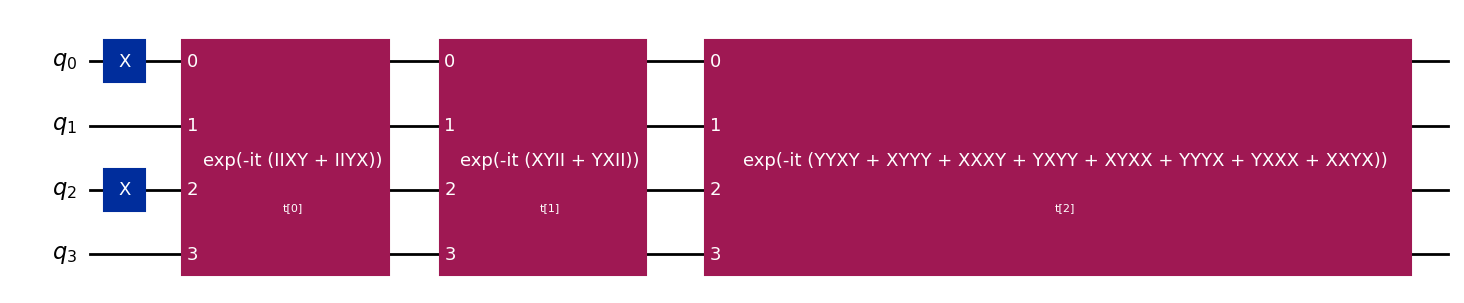

In [67]:
ansatz.decompose(reps=1).draw('mpl')

In [56]:
print(ansatz.decompose(reps=3))

     ┌──────────┐┌─────┐┌───┐┌───┐┌──────────────┐┌───┐┌───┐ ┌───┐ ┌───┐┌───┐»
q_0: ┤ U(π,0,π) ├┤ Sdg ├┤ H ├┤ X ├┤ Rz(1.0*t[0]) ├┤ X ├┤ H ├─┤ S ├─┤ H ├┤ X ├»
     └──┬───┬───┘└─────┘└───┘└─┬─┘└──────────────┘└─┬─┘├───┤┌┴───┴┐├───┤└─┬─┘»
q_1: ───┤ H ├──────────────────■────────────────────■──┤ H ├┤ Sdg ├┤ H ├──■──»
     ┌──┴───┴───┐┌─────┐┌───┐┌───┐┌──────────────┐┌───┐├───┤└┬───┬┘├───┤┌───┐»
q_2: ┤ U(π,0,π) ├┤ Sdg ├┤ H ├┤ X ├┤ Rz(1.0*t[1]) ├┤ X ├┤ H ├─┤ S ├─┤ H ├┤ X ├»
     └──┬───┬───┘└─────┘└───┘└─┬─┘└──────────────┘└─┬─┘├───┤┌┴───┴┐├───┤└─┬─┘»
q_3: ───┤ H ├──────────────────■────────────────────■──┤ H ├┤ Sdg ├┤ H ├──■──»
        └───┘                                          └───┘└─────┘└───┘     »
«     ┌───────────────┐┌───┐┌───┐┌─────┐ ┌───┐                ┌───┐»
«q_0: ┤ Rz(-1.0*t[0]) ├┤ X ├┤ H ├┤ Sdg ├─┤ H ├────────────────┤ X ├»
«     └───────────────┘└─┬─┘├───┤└┬───┬┘ ├───┤           ┌───┐└─┬─┘»
«q_1: ───────────────────■──┤ H ├─┤ S ├──┤ H ├───────────┤ X ├──■──»
«     ┌──────

In [10]:
import numpy as np 
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import COBYLA , SLSQP, L_BFGS_B, SPSA, NELDER_MEAD
from qiskit_algorithms import VQE
#from qiskit.utils import QuantumInstance


estimator = Estimator()
optimizer = SLSQP(maxiter=200)

vqe = VQE(estimator, ansatz, optimizer)
res = vqe.compute_minimum_eigenvalue(qubit_p_op)


In [7]:
print(res)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 37,
    'eigenvalue': -1.8572749387015388,
    'optimal_circuit': <qiskit_nature.second_q.circuit.library.ansatzes.ucc.UCC object at 0x7fa055ec3ca0>,
    'optimal_parameters': {   ParameterVectorElement(t[0]): 1.5710444407680315,
                              ParameterVectorElement(t[1]): 1.570573883173487,
                              ParameterVectorElement(t[2]): -4.824037940319017},
    'optimal_point': array([ 1.57104444,  1.57057388, -4.82403794]),
    'optimal_value': -1.8572749387015388,
    'optimizer_evals': None,
    'optimizer_result': <qiskit_algorithms.optimizers.optimizer.OptimizerResult object at 0x7fa244205f30>,
    'optimizer_time': 0.43024277687072754}


In [29]:
import numpy as np
from qiskit_algorithms.optimizers import COBYLA , SLSQP, L_BFGS_B, SPSA, NELDER_MEAD
from qiskit_algorithms import VQE
from qiskit_algorithms.utils import algorithm_globals


# we will iterate over these different optimizers
optimizers = [COBYLA(maxiter=200), L_BFGS_B(maxiter=200), SLSQP(maxiter=200)]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    #algorithm_globals.random_seed = 50
    #ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")

    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(qubit_p_op)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

Optimizer: SLSQP           

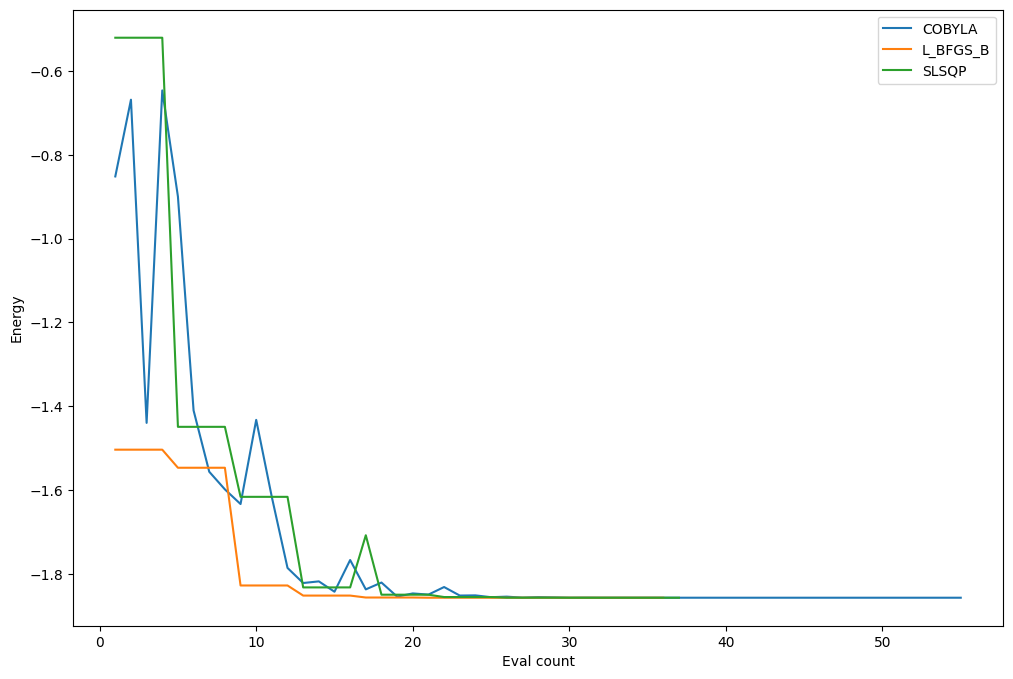

In [30]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
# pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [12]:
from qiskit_algorithms.eigensolvers import NumPyEigensolver

numpy_solver = NumPyEigensolver()
exact_result = numpy_solver.compute_eigenvalues(qubit_p_op)
ref_value = exact_result.eigenvalues
print(f"Reference value: {ref_value  }")
print(f"VQE values: {res.optimal_value }")
print(f"Delta from reference energy value is {(res.optimal_value - ref_value)}")

Reference value: [-1.85727503]
VQE values: -1.857275030176088
Delta from reference energy value is [2.62925237e-11]


In [27]:
# (Giả sử các phần import và định nghĩa problem, mapper, qubit_jw_op đã có ở trên)
import matplotlib.pyplot as plt
import numpy as np

# Danh sách để lưu các giá trị năng lượng từ VQE ở mỗi bước
vqe_values = []

# Hàm callback để lưu lại giá trị năng lượng
def store_intermediate_result(eval_count, parameters, mean, std):
    """Lưu trữ các giá trị trung gian từ VQE."""
    vqe_values.append(mean)

In [ ]:
# (Giả sử các phần import và định nghĩa problem, mapper, qubit_jw_op đã có ở trên)
import matplotlib.pyplot as plt
import numpy as np

# Danh sách để lưu các giá trị năng lượng từ VQE ở mỗi bước
vqe_values = []

# Hàm callback để lưu lại giá trị năng lượng
def store_intermediate_result(eval_count, parameters, mean, std):
    """Lưu trữ các giá trị trung gian từ VQE."""
    vqe_values.append(mean)

ansatz = UCC(
    num_spatial_orbitals=problem.num_spatial_orbitals,
    num_particles=problem.num_particles,
    excitations='sd',
    qubit_mapper=mapper,
    initial_state=HartreeFock(
        num_spatial_orbitals=problem.num_spatial_orbitals,
        num_particles=problem.num_particles,
        qubit_mapper=mapper,
    ),
    reps=1,
)

estimator = Estimator()
optimizer = SLSQP(maxiter=200)

# Thiết lập VQE với callback
vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)

# Chạy VQE
res = vqe.compute_minimum_eigenvalue(qubit_p_op)



# Tính toán kết quả chính xác
numpy_solver = NumPyEigensolver()
exact_result = numpy_solver.compute_eigenvalues(qubit_p_op)
ref_value = exact_result.eigenvalues[0] # Lấy giá trị riêng thấp nhất (năng lượng trạng thái cơ bản)



In [41]:
# Tên file kết quả
output_file = "vqe_results.txt"

# Ghi kết quả vào file
with open("vqe_results.txt", "w") as f:
    f.write("Step,Energy (Hartree)\n")
    for i, energy in enumerate(vqe_values):
        f.write(f"{i}  {energy:.12f}\n")



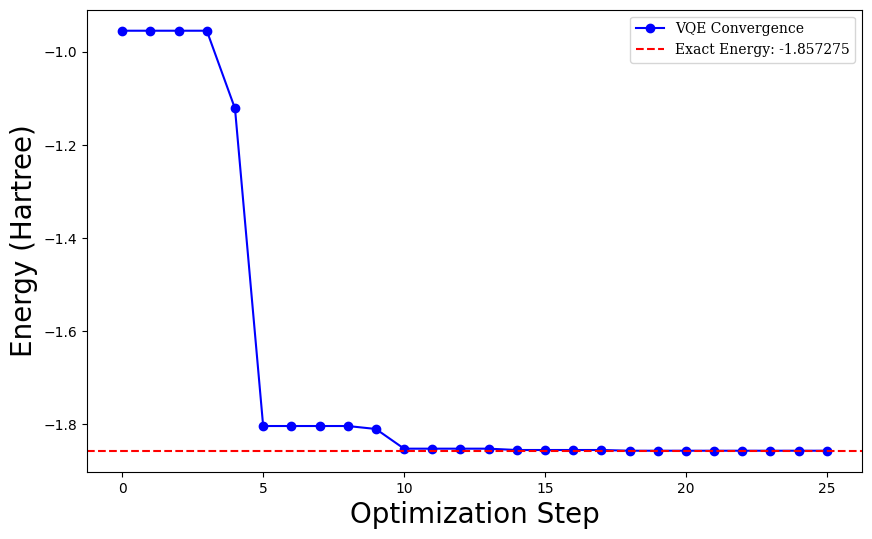

VQE Result: -1.8572748672288313
Exact Result: -1.8572750302023837
Error: 1.6297355243111156e-07


In [56]:
# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Vẽ đường hội tụ của VQE
plt.plot(range(len(vqe_values)), vqe_values, marker='o', linestyle='-', color='b', label='VQE Convergence')

# Vẽ đường năng lượng chính xác
plt.axhline(y=ref_value, color='r', linestyle='--', label=f'Exact Energy: {ref_value:.6f}')

# Đặt tiêu đề và nhãn
#plt.title('VQE Convergence vs. Exact Energy')
plt.xlabel('Optimization Step', fontsize=20)
plt.ylabel('Energy (Hartree)', fontsize=20)
plt.legend(fontsize=30, prop={'family': 'serif'})
#plt.grid(True)
plt.show()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)


# In kết quả cuối cùng
print(f"VQE Result: {res.eigenvalue}")
print(f"Exact Result: {ref_value}")
print(f"Error: {abs(res.eigenvalue - ref_value)}")

In [15]:
optimal_params = res.optimal_parameters
ground_state_circuit = ansatz.assign_parameters(optimal_params)
from qiskit.quantum_info import Statevector
ground_state = Statevector(ground_state_circuit)
print("Vector trạng thái cơ bản:", ground_state.data)

Vector trạng thái cơ bản: [ 8.12941988e-18+3.67131820e-17j  1.28820673e-17+1.08497751e-17j
  2.42442579e-18-3.58849955e-17j -7.13074457e-18+3.58849955e-17j
  6.69984306e-17+3.73100718e-17j  9.93768515e-01-3.97715193e-18j
 -1.15282523e-04-5.55111512e-17j -4.83066645e-17+4.40937720e-17j
  7.10903660e-17+5.24074698e-17j -1.99502620e-04-9.69402527e-17j
 -1.11463385e-01+7.10777329e-17j  1.37289574e-16-3.18211490e-17j
  1.55680422e-17+3.35550090e-17j -3.99104309e-18+7.13439442e-18j
  7.08258846e-17-7.43097770e-18j -2.47442149e-18-5.95686507e-17j]


In [16]:
circuit = ansatz.assign_parameters(res.optimal_parameters)
psi_0_vqe = np.array(Statevector(circuit).data)
print("Vector trạng thái VQE:", psi_0_vqe)

Vector trạng thái VQE: [ 8.12941988e-18+3.67131820e-17j  1.28820673e-17+1.08497751e-17j
  2.42442579e-18-3.58849955e-17j -7.13074457e-18+3.58849955e-17j
  6.69984306e-17+3.73100718e-17j  9.93768515e-01-3.97715193e-18j
 -1.15282523e-04-5.55111512e-17j -4.83066645e-17+4.40937720e-17j
  7.10903660e-17+5.24074698e-17j -1.99502620e-04-9.69402527e-17j
 -1.11463385e-01+7.10777329e-17j  1.37289574e-16-3.18211490e-17j
  1.55680422e-17+3.35550090e-17j -3.99104309e-18+7.13439442e-18j
  7.08258846e-17-7.43097770e-18j -2.47442149e-18-5.95686507e-17j]


In [17]:
numpy_solver = NumPyEigensolver()
exact_result = numpy_solver.compute_eigenvalues(qubit_p_op)
psi_0_exact = exact_result.eigenstates[0].data
fidelity = np.abs(np.vdot(psi_0_exact, psi_0_vqe))**2
print(f"Fidelity giữa VQE và exact: {fidelity:.6f}")

Fidelity giữa VQE và exact: 1.000000


In [10]:
# Chuyển toán tử sang dạng ma trận
from qiskit.quantum_info import SparsePauliOp
Hopt = qubit_p_op # Hamiltonian tĩnh (static)
H_static = Hopt.to_matrix()
print(Hopt)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.12091263+0.j,
  0.17218393+0.j,  0.16892754+0.j, -0.22575349+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])


In [14]:
print("Ma trận Hamiltonian tĩnh:,", H_static)

Ma trận Hamiltonian tĩnh:, [[ 9.71445147e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.25633907e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -4.71896007e-01+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0

In [4]:
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()

dipole_ops = dipole.second_q_ops()
print("Nội dung của dipole_ops:", dipole_ops)
# Lấy toán tử moment lưỡng cực từ phương Z (vì X và Y rỗng)
dipole_op = dipole_ops["ZDipole"]
dipole_qubit = mapper.map(dipole_op)
dipole_matrix = dipole_qubit.to_matrix()

Nội dung của dipole_ops: {'XDipole': FermionicOp({}, num_spin_orbitals=4, ), 'YDipole': FermionicOp({}, num_spin_orbitals=4, ), 'ZDipole': FermionicOp({'+_0 -_0': 0.6944743507776598, '+_0 -_1': -0.927833470459232, '+_1 -_0': -0.9278334704592321, '+_1 -_1': 0.6944743507776604, '+_2 -_2': 0.6944743507776598, '+_2 -_3': -0.927833470459232, '+_3 -_2': -0.9278334704592321, '+_3 -_3': 0.6944743507776604}, num_spin_orbitals=4, )}


In [5]:
print("dipole moment operator:", dipole_qubit)

dipole moment operator: SparsePauliOp(['IIII', 'IIIZ', 'IIYY', 'IIXX', 'IIZI', 'IZII', 'YYII', 'XXII', 'ZIII'],
              coeffs=[ 1.3889487 +0.j, -0.34723718+0.j, -0.46391674+0.j, -0.46391674+0.j,
 -0.34723718+0.j, -0.34723718+0.j, -0.46391674+0.j, -0.46391674+0.j,
 -0.34723718+0.j])


In [16]:
# Thiết lập các tham số cho trường ngoài phụ thuộc thời gian
Gamma = 0.25
E0 = 0.01
# Thiết lập các tham số tiến hóa thời gian
T_total = 100    
dt = 0.1         
num_steps = int(T_total / dt)
num_qubits = Hopt.num_qubits  #4

# Hàm tính Hamiltonian H(t)
def H_t(t, H_static, dipole_matrix, E0, Gamma):
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    return H_static + f_t * dipole_matrix

# Khởi tạo ma trận tiến hóa tổng U_total là ma trận đơn vị
U_total = np.eye(2**num_qubits, dtype=complex)



In [ ]:
# -*- coding: utf-8 -*-
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper
# (Các import khác từ phần VQE nếu cần lấy psi0 sau này)

from qiskit.quantum_info import SparsePauliOp
import numpy as np
from scipy.linalg import expm # Cần cho Magnus
import time # Để đo thời gian
import matplotlib.pyplot as plt # Để vẽ đồ thị nếu cần

H_static_mat = qubit_p_op.to_matrix()
D_mat = dipole_qubit.to_matrix()
num_qubits = qubit_p_op.num_qubits
DIM = 2**num_qubits
print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")

# --- Thiết lập các tham số mô phỏng ---
Gamma = 0.25
E0 = 0.01
T_TOTAL = 100 # *** Giảm T_TOTAL để chạy ví dụ nhanh hơn ***
DT = 0.01    # *** Giảm DT để tăng độ chính xác, nhưng sẽ lâu hơn ***
NUM_STEPS = int(T_TOTAL / DT)
TARGET_TIMES = np.linspace(0, T_TOTAL, NUM_STEPS + 1)
print(f"Tham số mô phỏng: T_total={T_TOTAL}, dt={DT}, Num_steps={NUM_STEPS}")
if NUM_STEPS * (DIM**3) > 1e8: # Ước tính sơ bộ O(N^3 * DIM^3) cho expm + O(DIM^2) cho Omega2
     print("CẢNH BÁO: Số bước hoặc kích thước ma trận lớn, tính toán có thể chậm!")

# --- Định nghĩa hàm trường và Hamiltonian phụ thuộc thời gian ---
def f_lorentzian(t, E0, Gamma):
    """ Hàm xung Lorentzian """
    if Gamma == 0: return 0.0
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

def H_matrix(t):
    """ Trả về ma trận Hamiltonian tại thời điểm t """
    safe_t = np.clip(t, 0, T_TOTAL)
    f_t_safe = f_lorentzian(safe_t, E0, Gamma)
    return H_static_mat + f_t_safe * D_mat

# --- Tính toán trước Giao hoán tử [H0, D] ---
print("Tính toán trước [H0, D]...")
Comm_H0_D = H_static_mat @ D_mat - D_mat @ H_static_mat

# --- Tính toán U(t_j) bằng Khai triển Magnus Bậc 2 (Step-wise) ---
# Phương pháp này tính U(t+dt, t) ≈ expm(Omega1_step + Omega2_step) cho mỗi bước dt
# Omega1_step ≈ -i * H(t+dt/2) * dt
# Omega2_step ≈ -0.5 * integral_t^{t+dt} ds1 integral_t^{s1} ds2 (f(s2) - f(s1)) * Comm_H0_D
# Tích phân kép cho Omega2 được xấp xỉ bằng phương pháp trung điểm lồng nhau.
print(f"\n--- Bắt đầu tính toán U(t_j) bằng Magnus Bậc 2 (Step-wise) ---")
print(f"(Xấp xỉ Omega2 trong mỗi bước dt. Độ chính xác phụ thuộc mạnh vào DT)")
start_time_magnus2 = time.time()

U_current = np.eye(DIM, dtype=complex)
U_at_tj = {0.0: U_current.copy()} # Lưu U(0) = I

for i in range(NUM_STEPS):
    t_prev = TARGET_TIMES[i]
    t_curr = TARGET_TIMES[i+1]
    t_mid = t_prev + DT / 2 # Điểm giữa cho Omega1 và tích phân ngoài Omega2
    t_quarter = t_prev + DT / 4 # Điểm giữa cho tích phân trong Omega2 (ước lượng)

    # --- Tính Omega1 cho bước này ---
    H_mid = H_matrix(t_mid)
    Omega1_step = -1j * H_mid * DT

    # --- Tính Omega2 cho bước này (Xấp xỉ tích phân kép) ---
    # Ước lượng tích phân kép bằng quy tắc trung điểm lồng nhau:
    # outer integral dt1 ≈ dt * (inner_integral evaluated at s1=t_mid)
    # inner integral ds2 ≈ (dt/2) * (integrand evaluated at s2=t_quarter)
    f_t1_mid = f_lorentzian(t_mid, E0, Gamma)
    f_t2_quarter = f_lorentzian(t_quarter, E0, Gamma)

    # integrand(s1_mid, s2_quarter) ≈ (f_t2_quarter - f_t1_mid) * Comm_H0_D
    integrand_approx = (f_t2_quarter - f_t1_mid) * Comm_H0_D

    # Inner integral approx ≈ integrand_approx * (dt/2) (chiều dài khoảng [t_prev, t_mid])
    inner_integral_approx = integrand_approx * (DT / 2.0)

    # Omega2_step approx ≈ -0.5 * inner_integral_approx * dt (chiều dài khoảng ngoài [t_prev, t_curr])
    Omega2_step = -0.5 * inner_integral_approx * DT
    # Lưu ý: Đây là một xấp xỉ khá thô cho tích phân kép Omega2 trong khoảng dt.
    # Độ chính xác thực sự của phương pháp Magnus bậc 2 đòi hỏi tích phân chính xác hơn.

    # --- Kết hợp và tính U_step ---
    Omega_approx_step = Omega1_step + Omega2_step

    # (Tùy chọn) Kiểm tra anti-hermitian của Omega_step (nên làm nếu nghi ngờ)
    # Omega_step_dag = Omega_approx_step.conj().T
    # anti_herm_diff_step = np.linalg.norm(Omega_step_dag + Omega_approx_step)
    # if not np.isclose(anti_herm_diff_step, 0.0, atol=1e-7):
    #       print(f"  Warning: Omega_step at t={t_prev:.2f} not anti-Hermitian: {anti_herm_diff_step:.2e}")

    # Tính toán tử tiến hóa cho bước này U_step = expm(Omega_approx_step)
    U_step = expm(Omega_approx_step)

    # Cập nhật toán tử tiến hóa tổng cộng: U(t_curr) = U_step * U(t_prev)
    U_current = U_step @ U_current

    # Lưu kết quả tại thời điểm t_curr
    # Làm tròn key để tránh lỗi float
    time_key = round(t_curr, 10) # Làm tròn để tránh lỗi key do float
    U_at_tj[time_key] = U_current.copy()


    # Chỉ báo tiến trình
    if (i + 1) % max(1, NUM_STEPS // 20) == 0:
        elapsed_time = time.time() - start_time_magnus2
        print(f"  Magnus(2) Step {i+1}/{NUM_STEPS} (t={t_curr:.2f}) calculated. ({elapsed_time:.1f} s)")


end_time_magnus2 = time.time()
total_magnus2_time = end_time_magnus2 - start_time_magnus2
print(f"Hoàn thành tính toán Magnus Bậc 2 (Step-wise) trong {total_magnus2_time:.2f} giây.")

# --- Hàm kiểm tra Unitarity ---
def check_unitarity(U, name, tol=1e-8):
    Id = np.eye(U.shape[0], dtype=complex)
    UdU = U.conj().T @ U
    norm_diff = np.linalg.norm(UdU - Id)
    print(f"Kiểm tra Unitarity cho {name}:")
    print(f"  ||U^dagger * U - I|| = {norm_diff:.3e}")
    if np.isclose(norm_diff, 0.0, atol=tol):
        print(f"  {name} là unitary trong giới hạn dung sai {tol}.")
        return True
    else:
        print(f"  CẢNH BÁO: {name} KHÔNG unitary trong giới hạn dung sai {tol}.")
        return False

# --- Kiểm tra Unitarity của kết quả cuối cùng ---
final_time_key = round(T_TOTAL, 10)
if final_time_key in U_at_tj:
    U_final_magnus2 = U_at_tj[final_time_key]
    check_unitarity(U_final_magnus2, f"U_Magnus2(T={T_TOTAL:.2f})", tol=1e-7)
else:
    print(f"Không tìm thấy key thời gian cuối {final_time_key} trong kết quả.")


print("\nTính toán hoàn tất.")
print(f"Biến `U_at_tj` là dictionary chứa các ma trận U(t_j) xấp xỉ bằng Magnus bậc 2 (step-wise).")
print("Lưu ý: Độ chính xác của Omega2 trong mỗi bước phụ thuộc vào xấp xỉ tích phân kép.")

# --- (Tùy chọn) Sử dụng kết quả để tính động lực học ---
# (Thêm code tính psi(t_j) và phổ như trong câu trả lời trước, dùng U_at_tj)
# ...

Chạy phần Qiskit để lấy toán tử...
Đã thêm moment lưỡng cực hạt nhân.
Xong phần lấy toán tử Qiskit.
Chuyển đổi toán tử sang ma trận...
Số qubit: 4, Kích thước ma trận: 16x16
Tham số mô phỏng: T_total=100, dt=0.01, Num_steps=10000
Tính toán trước [H0, D]...

--- Bắt đầu tính toán U(t_j) bằng Magnus Bậc 2 (Step-wise) ---
(Xấp xỉ Omega2 trong mỗi bước dt. Độ chính xác phụ thuộc mạnh vào DT)
  Magnus(2) Step 500/10000 (t=5.00) calculated. (0.0 s)
  Magnus(2) Step 1000/10000 (t=10.00) calculated. (0.1 s)
  Magnus(2) Step 1500/10000 (t=15.00) calculated. (0.1 s)
  Magnus(2) Step 2000/10000 (t=20.00) calculated. (0.1 s)
  Magnus(2) Step 2500/10000 (t=25.00) calculated. (0.2 s)
  Magnus(2) Step 3000/10000 (t=30.00) calculated. (0.2 s)
  Magnus(2) Step 3500/10000 (t=35.00) calculated. (0.2 s)
  Magnus(2) Step 4000/10000 (t=40.00) calculated. (0.2 s)
  Magnus(2) Step 4500/10000 (t=45.00) calculated. (0.3 s)
  Magnus(2) Step 5000/10000 (t=50.00) calculated. (0.3 s)
  Magnus(2) Step 5500/10000 (t=

In [ ]:
# -*- coding: utf-8 -*-
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC
from qiskit_algorithms.optimizers import COBYLA , SLSQP, L_BFGS_B
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator
from qiskit_algorithms.eigensolvers import NumPyEigensolver
from qiskit.quantum_info import SparsePauliOp, Statevector # Thêm Statevector nếu cần psi0
import numpy as np
from scipy.linalg import expm # Cần cho Magnus
import time # Để đo thời gian
import matplotlib.pyplot as plt # Thêm để có thể vẽ đồ thị nếu cần




# Lấy toán tử moment lưỡng cực Z và mapping
dipole_ops = dipole.second_q_ops()
# Đảm bảo chỉ lấy thành phần Z nếu X, Y không đáng kể hoặc bằng 0
dipole_op_z_fermionic = dipole_ops.get("ZDipole", None) # Lấy toán tử Z
if dipole_op_z_fermionic is None:
     raise ValueError("Không tìm thấy toán tử ZDipole.")
dipole_qubit = mapper.map(dipole_op_z_fermionic) # Dạng SparsePauliOp
print("Xong phần lấy Dipole Z (dipole_qubit).")


# --- Chuyển toán tử sang dạng ma trận ---
print("Chuyển đổi toán tử sang ma trận...")
H_static_mat = qubit_p_op.to_matrix()
D_mat = dipole_qubit.to_matrix()
num_qubits = qubit_p_op.num_qubits
DIM = 2**num_qubits
print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")

# --- Thiết lập các tham số mô phỏng ---
Gamma = 0.25
E0 = 0.01
T_TOTAL = 100 # *** Giảm T_TOTAL để chạy ví dụ nhanh hơn, 100 sẽ rất lâu ***
DT = 0.1    # *** Giảm DT để tăng độ chính xác, nhưng sẽ lâu hơn ***
NUM_STEPS = int(T_TOTAL / DT)
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS + 1)
print(f"Tham số mô phỏng: T_total={T_TOTAL}, dt={DT}, Num_steps={NUM_STEPS}")
if NUM_STEPS > 500: # Cảnh báo nếu số bước lớn
    print("CẢNH BÁO: Số bước thời gian lớn, tính toán Magnus bậc 2 có thể rất chậm!")


# --- Định nghĩa hàm trường và Hamiltonian phụ thuộc thời gian ---
def f_lorentzian(t, E0, Gamma):
    """ Hàm xung Lorentzian (theo định nghĩa H_t của bạn) """
    # Tránh chia cho 0 nếu Gamma=0, mặc dù không nên
    if Gamma == 0: return 0.0
    # Lưu ý: Bài báo Wan dùng Lorentz: Gamma / (Gamma^2 + t^2). Bạn dùng /pi?
    # Sử dụng công thức bạn cung cấp trong hàm H_t gốc:
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    # Nếu muốn dùng xung Gaussian như ví dụ trước:
    # T0 = T_TOTAL / 2
    # return E0 * np.exp(-((t - T0)**2) / (2 * Gamma**2))


def H_matrix(t):
    """ Trả về ma trận Hamiltonian tại thời điểm t """
    # Sử dụng hàm xung Lorentzian bạn định nghĩa
    f_t = f_lorentzian(t, E0, Gamma)
    return H_static_mat + f_t * D_mat

# --- Tính toán trước Giao hoán tử [H0, D] ---
print("Tính toán trước [H0, D]...")
Comm_H0_D = H_static_mat @ D_mat - D_mat @ H_static_mat

# --- Tính toán Khai triển Magnus Bậc 2 ---
print(f"\n--- Bắt đầu tính toán Khai triển Magnus Bậc 2 ---")
print(f"(Tính toán này có thể mất nhiều thời gian với {NUM_STEPS} bước...)")
start_time_magnus = time.time()

Omega1 = np.zeros((DIM, DIM), dtype=complex)
Omega2 = np.zeros((DIM, DIM), dtype=complex)

# --- Tính Omega1 = -i * integral(H(t1) dt1) ---
for i in range(NUM_STEPS):
    t1_mid = TIME_POINTS[i] + DT / 2
    H_t1_mid = H_matrix(t1_mid)
    Omega1 += H_t1_mid * DT
Omega1 *= -1j
print(f"Đã tính Omega1.")

# --- Tính Omega2 = -0.5 * integral_0^T dt1 integral_0^t1 dt2 (f(t2) - f(t1)) * Comm_H0_D ---
integral2_payload = np.zeros((DIM, DIM), dtype=complex)
for i in range(NUM_STEPS): # Vòng lặp ngoài cho t1 (0 đến T-dt)
    t1 = TIME_POINTS[i]
    t1_mid = t1 + DT / 2
    f_t1 = f_lorentzian(t1_mid, E0, Gamma)

    # Tích phân nội tại theo t2 từ 0 đến t1 = TIME_POINTS[i]
    integral_inner = np.zeros((DIM, DIM), dtype=complex)
    for j in range(i + 1): # Vòng lặp trong cho t2 (0 đến i)
        t2 = TIME_POINTS[j]
        t2_mid = t2 + DT / 2
        if t2_mid > t1_mid + 1e-9: continue # Đảm bảo t2 <= t1

        f_t2 = f_lorentzian(t2_mid, E0, Gamma)
        integrand = (f_t2 - f_t1) * Comm_H0_D
        # Chỉ cộng nếu khoảng thời gian [tj, tj+DT] nằm hoàn toàn trong [0, t1]
        # Sử dụng quy tắc trung điểm nên chỉ cần kiểm tra điểm giữa
        integral_inner += integrand * DT

    # Cộng vào tích phân kép
    integral2_payload += integral_inner * DT

    # Chỉ báo tiến trình
    if (i + 1) % max(1, NUM_STEPS // 20) == 0:
        elapsed_time = time.time() - start_time_magnus
        print(f"  Omega2 progress: Step {i+1}/{NUM_STEPS} ({elapsed_time:.1f} s)")


Omega2 = -0.5 * integral2_payload
print(f"Đã tính Omega2.")

# --- Kết hợp các số hạng ---
Omega_approx = Omega1 + Omega2

# --- Kiểm tra tính Anti-Hermitian ---
Omega_dag = Omega_approx.conj().T
anti_herm_diff = np.linalg.norm(Omega_dag + Omega_approx)
print(f"\nKiểm tra Anti-Hermitian cho Omega_Magnus2:")
print(f"||Omega^dagger + Omega|| = {anti_herm_diff:.3e}")
if not np.isclose(anti_herm_diff, 0.0, atol=1e-7): # Dung sai chặt hơn một chút
      print("  CẢNH BÁO: Omega_Magnus2 không hoàn toàn anti-Hermitian.")
      print("           Nguyên nhân có thể do sai số tích phân số (thử DT nhỏ hơn).")
else:
      print("  Omega_Magnus2 gần như anti-Hermitian.")

# --- Tính U(T_TOTAL) cuối cùng bằng hàm mũ ma trận ---
print(f"\nTính U(T_TOTAL) = expm(Omega_approx)...")
U_magnus2 = expm(Omega_approx)
end_time_magnus = time.time()
total_magnus_time = end_time_magnus - start_time_magnus
print(f"Hoàn thành tính toán Magnus Bậc 2 trong {total_magnus_time:.2f} giây.")

# --- Hàm kiểm tra Unitarity ---
def check_unitarity(U, name, tol=1e-8):
    Id = np.eye(U.shape[0], dtype=complex)
    UdU = U.conj().T @ U
    norm_diff = np.linalg.norm(UdU - Id)
    print(f"Kiểm tra Unitarity cho {name}:")
    print(f"  ||U^dagger * U - I|| = {norm_diff:.3e}")
    if np.isclose(norm_diff, 0.0, atol=tol):
        print(f"  {name} là unitary trong giới hạn dung sai {tol}.")
        return True
    else:
        print(f"  CẢNH BÁO: {name} KHÔNG unitary trong giới hạn dung sai {tol}.")
        return False

# --- Kiểm tra Unitarity của kết quả ---
check_unitarity(U_magnus2, "U_Magnus2", tol=1e-7)

print("\nTính toán hoàn tất. Biến U_magnus2 chứa ma trận xấp xỉ cho U(T_TOTAL).")

# --- (Tùy chọn) Tính toán động lực học trạng thái ---
# Nếu bạn muốn xem trạng thái tiến hóa như thế nào
# 1. Lấy trạng thái ban đầu psi0 từ VQE
# estimator_vqe = Estimator() # Cần estimator để chạy VQE nếu chưa có 'res'
# vqe = VQE(estimator_vqe, ansatz, optimizer) # Dùng optimizer tốt nhất từ lần chạy trước
# res = vqe.compute_minimum_eigenvalue(qubit_p_op)
# optimal_params = res.optimal_parameters
# psi0_circuit = ansatz.bind_parameters(optimal_params)
# psi0_vector = Statevector(psi0_circuit).data # Tính statevector ban đầu

# 2. Tính trạng thái cuối cùng
# if 'psi0_vector' in locals():
#     psi_final_magnus = U_magnus2 @ psi0_vector
#     print("\nTrạng thái cuối cùng (xấp xỉ Magnus Bậc 2):")
#     # print(psi_final_magnus) # In ra vector trạng thái
#     print(f"Norm trạng thái cuối: {np.linalg.norm(psi_final_magnus)}") # Nên bằng 1
# else:
#     print("\nKhông thể tính trạng thái cuối do thiếu psi0_vector từ VQE.")

Xong phần lấy Dipole Z (dipole_qubit).
Chuyển đổi toán tử sang ma trận...
Số qubit: 4, Kích thước ma trận: 16x16
Tham số mô phỏng: T_total=100, dt=0.1, Num_steps=1000
CẢNH BÁO: Số bước thời gian lớn, tính toán Magnus bậc 2 có thể rất chậm!
Tính toán trước [H0, D]...

--- Bắt đầu tính toán Khai triển Magnus Bậc 2 ---
(Tính toán này có thể mất nhiều thời gian với 1000 bước...)
Đã tính Omega1.
  Omega2 progress: Step 50/1000 (0.0 s)
  Omega2 progress: Step 100/1000 (0.0 s)
  Omega2 progress: Step 150/1000 (0.0 s)
  Omega2 progress: Step 200/1000 (0.1 s)
  Omega2 progress: Step 250/1000 (0.1 s)
  Omega2 progress: Step 300/1000 (0.1 s)
  Omega2 progress: Step 350/1000 (0.2 s)
  Omega2 progress: Step 400/1000 (0.2 s)
  Omega2 progress: Step 450/1000 (0.3 s)
  Omega2 progress: Step 500/1000 (0.3 s)
  Omega2 progress: Step 550/1000 (0.4 s)
  Omega2 progress: Step 600/1000 (0.5 s)
  Omega2 progress: Step 650/1000 (0.6 s)
  Omega2 progress: Step 700/1000 (0.6 s)
  Omega2 progress: Step 750/1000 

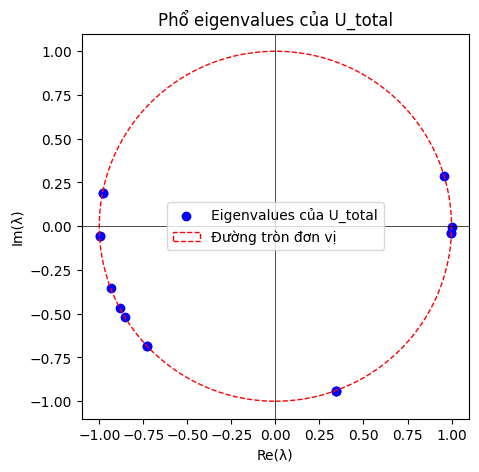

In [14]:
import matplotlib.pyplot as plt

eigenvalues = np.linalg.eigvals(U_magnus2)
plt.figure(figsize=(5,5))
plt.scatter(eigenvalues.real, eigenvalues.imag, color='b', label="Eigenvalues của U_total")
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle="--", label="Đường tròn đơn vị")
plt.gca().add_patch(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("Re(λ)")
plt.ylabel("Im(λ)")
plt.legend()
plt.title("Phổ eigenvalues của U_total")
plt.show()

In [15]:
import qiskit 
#  Tạo mạch lượng tử từ ma trận tiến hóa U_total
from qiskit.circuit.library import UnitaryGate

qc = qiskit.QuantumCircuit(num_qubits)
unitary_gate = UnitaryGate(U_magnus2)
qc.append(unitary_gate, range(num_qubits))

print("Mạch tiến hóa thời gian:")
print(qc.draw(output='text'))

Mạch tiến hóa thời gian:
     ┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1         ├
     │  Unitary │
q_2: ┤2         ├
     │          │
q_3: ┤3         ├
     └──────────┘


In [17]:
from qoop.compilation.qsp import QuantumStatePreparation
compiler = QuantumStatePreparation.prepare(U_magnus2)
print("Các tham số sau khi biên dịch:")
print(compiler.thetas)

Các tham số sau khi biên dịch:
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
 -2.71885275e-06 -2.71885275e-06 -2.71885275e-06 -2.71885275e-06
  9.99999995e-01  9.99999993e-01  1.00000000e+00  9.99999993e-01]


In [3]:

import numpy as np
from scipy.linalg import expm
import time
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit.quantum_info import Statevector

# Lấy toán tử từ Qiskit
print("Lấy toán tử từ Qiskit...")
driver = PySCFDriver(atom="H 0 0 0; H 0 0 0.735", basis="sto3g", charge=0, spin=0, unit=DistanceUnit.ANGSTROM)
problem = driver.run()
hamiltonian = problem.hamiltonian
dipole = problem.properties.electronic_dipole_moment
nuclear_dip = dipole.nuclear_dipole_moment
dipole.x_dipole.alpha += PolynomialTensor({"": nuclear_dip[0]})
dipole.y_dipole.alpha += PolynomialTensor({"": nuclear_dip[1]})
dipole.z_dipole.alpha += PolynomialTensor({"": nuclear_dip[2]})
second_q_op = hamiltonian.second_q_op()
mapper = JordanWignerMapper()
qubit_p_op = mapper.map(second_q_op)
dipole_ops = dipole.second_q_ops()
dipole_op_z_fermionic = dipole_ops.get("ZDipole")
if dipole_op_z_fermionic is None:
    raise ValueError("Không tìm thấy toán tử ZDipole.")
dipole_qubit = mapper.map(dipole_op_z_fermionic)
H_static_mat = qubit_p_op.to_matrix()
D_mat = dipole_qubit.to_matrix()
num_qubits = qubit_p_op.num_qubits
DIM = 2**num_qubits
print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")

# Tính trạng thái cơ bản bằng VQE
print("Chạy VQE để lấy trạng thái cơ bản...")
ansatz = UCC(
    num_spatial_orbitals=2,
    num_particles=[1, 1],
    excitations='sd',
    qubit_mapper=mapper,
    initial_state=HartreeFock(
        num_spatial_orbitals=2,
        num_particles=[1, 1],
        qubit_mapper=mapper,
    ),
    reps=1,
)
optimizer = SLSQP(maxiter=200)
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)
res = vqe.compute_minimum_eigenvalue(qubit_p_op)
print(f"VQE energy: {res.optimal_value:.6f}")

# Lấy trạng thái cơ bản |psi_0> mà không dùng AerSimulator
print("Lấy trạng thái cơ bản |psi_0>...")
circuit = ansatz.assign_parameters(res.optimal_parameters)
psi_0 = Statevector(circuit)
psi_0 = np.array(psi_0.data)
print(f"Norm của |psi_0>: {np.linalg.norm(psi_0):.6f}")

# Tham số mô phỏng
Gamma = 0.25
E0 = 0.01
T_TOTAL = 500  # fs
DT = 1  # fs
NUM_STEPS = int(T_TOTAL / DT) + 1
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS)
M = 20  # Số điểm tích phân

# Hàm Lorentzian
def f_lorentzian(t, E0, Gamma):
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

# Tích phân phân tích cho f(t)
def f_integral(t_start, t_end, E0, Gamma):
    return (E0 / np.pi) * (np.arctan(t_end / Gamma) - np.arctan(t_start / Gamma))

# Trọng số trapezoidal
def trapezoidal_weights(n):
    weights = np.ones(n)
    weights[0] = weights[-1] = 0.5
    return weights * (1.0 / (n - 1))

# Tính [H0, D]
print("Tính toán trước [H0, D]...")
Comm_H0_D = H_static_mat @ D_mat - D_mat @ H_static_mat

# Tính U(t_j, t_j + h)
def compute_U_tj_magnus2(t_j, h):
    if h == 0:
        return np.eye(DIM, dtype=complex)
    
    Omega1 = -1j * (H_static_mat * h + D_mat * f_integral(t_j, t_j + h, E0, Gamma))
    t_points = np.linspace(t_j, t_j + h, M)
    delta_t = h / (M - 1)
    weights = trapezoidal_weights(M) * delta_t
    f_values = np.array([f_lorentzian(t, E0, Gamma) for t in t_points])
    
    Omega2 = np.zeros((DIM, DIM), dtype=complex)
    for p in range(M):
        t1 = t_points[p]
        f_t1 = f_values[p]
        inner_sum = np.zeros((DIM, DIM), dtype=complex)
        for q in range(p + 1):
            t2 = t_points[q]
            f_t2 = f_values[q]
            inner_sum += (f_t2 - f_t1) * Comm_H0_D * weights[q]
        Omega2 += inner_sum * weights[p]
    Omega2 *= -0.5
    
    Omega = Omega1 + Omega2
    U = expm(Omega)
    return U

# Kiểm tra unitary
def check_unitarity(U):
    Id = np.eye(DIM, dtype=complex)
    norm_diff = np.linalg.norm(U.conj().T @ U - Id)
    return norm_diff

# Tính U(t_j) và chuẩn bị QSP
print("Bắt đầu tính U(t_j) bằng Magnus bậc 2...")
start_time = time.time()
target_unitaries = [np.eye(DIM, dtype=complex)]
thetas_list = []
unitary_errors = []

try:
    from qoop.compilation.qsp import QuantumStatePreparation
    qsp_available = True
except ImportError:
    qsp_available = False
    print("qoop không có sẵn, bỏ qua QSP.")

for j in range(NUM_STEPS - 1):
    t_j = TIME_POINTS[j]
    U_tj = compute_U_tj_magnus2(t_j, DT)
    U_total = U_tj @ target_unitaries[-1]
    target_unitaries.append(U_total)
    
    # QSP để tạo V(theta)
    if qsp_available:
        compiler = QuantumStatePreparation.prepare(U_tj)
        thetas = compiler.thetas
        thetas_list.append(thetas)
    
    error = check_unitarity(U_tj)
    unitary_errors.append(error)
    if (j + 1) % max(1, (NUM_STEPS - 1) // 20) == 0:
        print(f"Step {j+1}/{NUM_STEPS-1}, Unitary error: {error:.2e}")

end_time = time.time()
print(f"Total time: {end_time - start_time:.2f} seconds")
print(f"Average unitary error: {np.mean(unitary_errors):.2e}")
print(f"Max unitary error: {np.max(unitary_errors):.2e}")

# Lưu dữ liệu
if qsp_available:
    np.save("thetas_list.npy", np.array(thetas_list))
    print("QSP thetas saved.")
np.save("target_unitaries.npy", np.array(target_unitaries))
np.save("psi_0.npy", psi_0)
print("U(t_j) saved to target_unitaries.npy")
print("psi_0 saved to psi_0.npy")

Lấy toán tử từ Qiskit...
overwrite output file: /tmp/tmphpb12y1v.log
Số qubit: 4, Kích thước ma trận: 16x16
Chạy VQE để lấy trạng thái cơ bản...
VQE energy: -1.857275
Lấy trạng thái cơ bản |psi_0>...
Norm của |psi_0>: 1.000000
Tính toán trước [H0, D]...
Bắt đầu tính U(t_j) bằng Magnus bậc 2...
Step 25/500, Unitary error: 5.63e-16
Step 50/500, Unitary error: 4.88e-16
Step 75/500, Unitary error: 3.68e-16
Step 100/500, Unitary error: 6.39e-16
Step 125/500, Unitary error: 6.01e-16
Step 150/500, Unitary error: 5.39e-16
Step 175/500, Unitary error: 2.85e-16
Step 200/500, Unitary error: 7.64e-16
Step 225/500, Unitary error: 7.28e-16
Step 250/500, Unitary error: 4.91e-16
Step 275/500, Unitary error: 5.54e-16
Step 300/500, Unitary error: 7.94e-16
Step 325/500, Unitary error: 4.22e-16
Step 350/500, Unitary error: 6.16e-16
Step 375/500, Unitary error: 3.90e-16
Step 400/500, Unitary error: 5.99e-16
Step 425/500, Unitary error: 5.46e-16
Step 450/500, Unitary error: 4.27e-16
Step 475/500, Unitary er

Lấy toán tử moment lưỡng cực từ Qiskit...
overwrite output file: /tmp/tmpgrlvhrty.log
Đã lấy ma trận moment lưỡng cực Z.
Tải U(t_j) và psi_0...
Đã tải 501 ma trận U(t_j).
Norm của psi_0: 1.000000
Tính moment lưỡng cực d_z(t_j)...
Step 24/499, Dipole moment: 0.8048
Step 48/499, Dipole moment: 2.1434
Step 72/499, Dipole moment: 2.7677
Step 96/499, Dipole moment: 2.4425
Step 120/499, Dipole moment: 1.2786
Step 144/499, Dipole moment: -0.3051
Step 168/499, Dipole moment: -1.8002
Step 192/499, Dipole moment: -2.6766
Step 216/499, Dipole moment: -2.6332
Step 240/499, Dipole moment: -1.7091
Step 264/499, Dipole moment: -0.1880
Step 288/499, Dipole moment: 1.3931
Step 312/499, Dipole moment: 2.4905
Step 336/499, Dipole moment: 2.7561
Step 360/499, Dipole moment: 2.0687
Step 384/499, Dipole moment: 0.6793
Step 408/499, Dipole moment: -0.9314
Step 432/499, Dipole moment: -2.2416
Step 456/499, Dipole moment: -2.7749
Step 480/499, Dipole moment: -2.3643
Vẽ moment lưỡng cực d_z(t)...


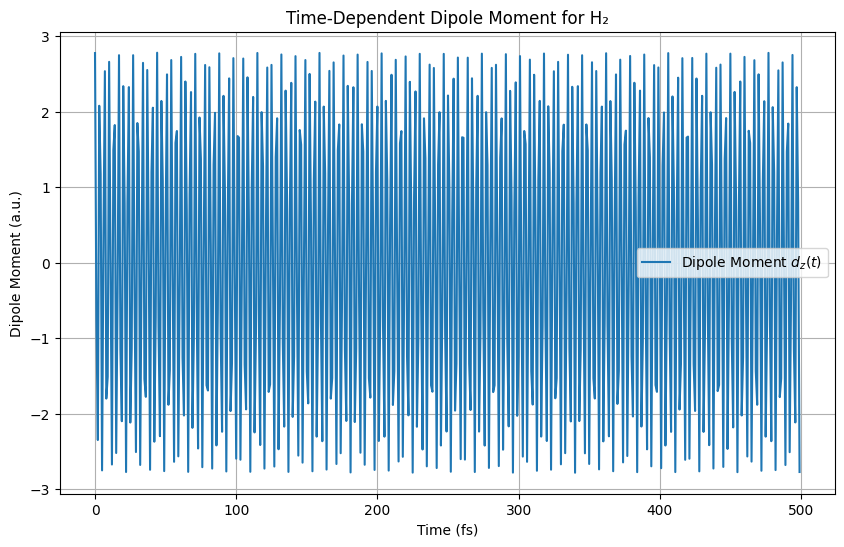

Tính phổ hấp thụ...
Vẽ phổ hấp thụ...


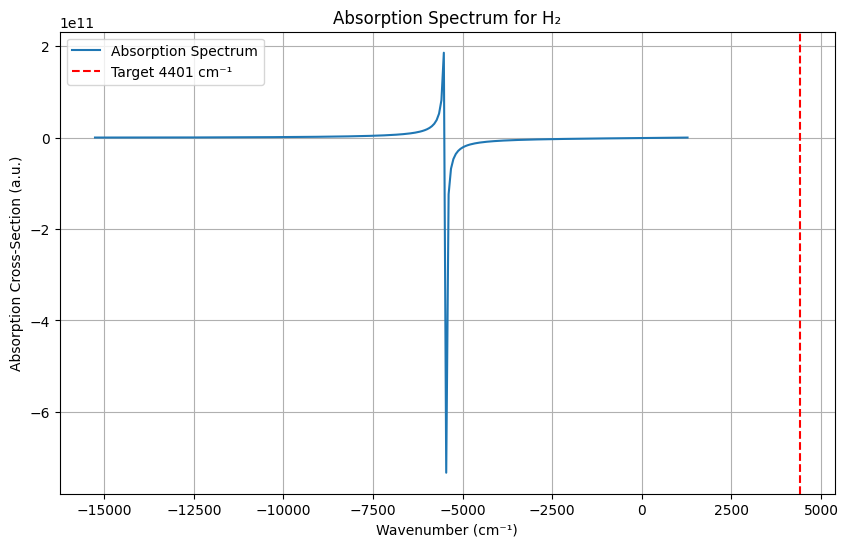

Đã lưu dipole_moment.npy và spectrum.npy


In [ ]:

import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper


# Tham số mô phỏng
Gamma = 0.25
E0 = 0.01
T_TOTAL = 500  # fs
DT = 1  # fs
NUM_STEPS = int(T_TOTAL / DT) + 1
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS)
GAMMA_FWHM = 0.01  # FWHM cho làm mịn phổ

# Hàm Lorentzian
def f_lorentzian(t, E0, Gamma):
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

# Tải U(t_j) và psi_0
print("Tải U(t_j) và psi_0...")
target_unitaries = np.load("target_unitaries.npy")
psi_0 = np.load("psi_0.npy")
print(f"Đã tải {len(target_unitaries)} ma trận U(t_j).")
print(f"Norm của psi_0: {np.linalg.norm(psi_0):.6f}")

# Tính moment lưỡng cực
print("Tính moment lưỡng cực d_z(t_j)...")
dipole_moment = []
for j, U_tj in enumerate(target_unitaries[:-1]):  # Bỏ U(t_0) = I
    psi_tj = U_tj @ psi_0
    d_z = np.vdot(psi_0, D_mat @ psi_tj).real  # <psi_0|U^dagger D U|psi_0>
    dipole_moment.append(d_z)
    if (j + 1) % max(1, (NUM_STEPS - 2) // 20) == 0:
        print(f"Step {j+1}/{NUM_STEPS-2}, Dipole moment: {d_z:.4f}")

dipole_moment = np.array(dipole_moment)

# Vẽ moment lưỡng cực
print("Vẽ moment lưỡng cực d_z(t)...")
plt.figure(figsize=(10, 6))
plt.plot(TIME_POINTS[:-1], dipole_moment, label="Dipole Moment $d_z(t)$")
plt.xlabel("Time (fs)")
plt.ylabel("Dipole Moment (a.u.)")
plt.title("Time-Dependent Dipole Moment for H₂")
plt.legend()
plt.grid(True)
plt.show()

# Tính phổ hấp thụ
print("Tính phổ hấp thụ...")
freqs = fftfreq(NUM_STEPS - 1, d=DT)  # fs^-1
d_omega = fft(dipole_moment) * DT
E_t = np.array([f_lorentzian(t, E0, Gamma) for t in TIME_POINTS[:-1]])
E_omega = fft(E_t) * DT
alpha_zz = d_omega / (E_omega + 1e-10)
c = 3e10  # cm/s
omega = 2 * np.pi * freqs * 1e15  # rad/s
sigma_abs = (4 * np.pi * omega / c) * np.imag(alpha_zz)
wavenumbers = freqs * 1e15 / c  # cm^-1
positive_mask = wavenumbers > 0
wavenumbers = wavenumbers[positive_mask]
sigma_abs = sigma_abs[positive_mask]
shift_cm = -1.9 * 8065.54  # cm^-1
wavenumbers_shifted = wavenumbers + shift_cm

# Làm mịn phổ
def lorentzian_broadening(wavenumbers, sigma_abs, gamma):
    broadened = np.zeros_like(wavenumbers)
    for i, w in enumerate(wavenumbers):
        lorentz = gamma / (np.pi * ((wavenumbers - w)**2 + gamma**2))
        broadened += sigma_abs[i] * lorentz
    return broadened

sigma_abs_broadened = lorentzian_broadening(wavenumbers_shifted, sigma_abs, GAMMA_FWHM)

# Vẽ phổ hấp thụ
print("Vẽ phổ hấp thụ...")
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers_shifted, sigma_abs_broadened, label="Absorption Spectrum")
plt.axvline(x=4401, color='r', linestyle='--', label="Target 4401 cm⁻¹")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorption Cross-Section (a.u.)")
plt.title("Absorption Spectrum for H₂")
plt.legend()
plt.grid(True)
plt.show()

# Lưu dữ liệu
np.save("dipole_moment.npy", dipole_moment)
np.save("spectrum.npy", np.vstack((wavenumbers_shifted, sigma_abs_broadened)))
print("Đã lưu dipole_moment.npy và spectrum.npy")


Lấy toán tử từ Qiskit...
overwrite output file: /tmp/tmp4usdvqk0.log
Số qubit: 4, Kích thước ma trận: 16x16
Chạy VQE cải tiến...
VQE energy: -1.857275
Norm của psi_0 (VQE): 1.000000
Tính U(t_j) bằng Trotter bậc 2...
Step 500/10000
Step 1000/10000
Step 1500/10000
Step 2000/10000
Step 2500/10000
Step 3000/10000
Step 3500/10000
Step 4000/10000
Step 4500/10000
Step 5000/10000
Step 5500/10000
Step 6000/10000
Step 6500/10000
Step 7000/10000
Step 7500/10000
Step 8000/10000
Step 8500/10000
Step 9000/10000
Step 9500/10000
Step 10000/10000
Tính moment lưỡng cực Trotter...
Step 499/9999, Dipole moment: 2.7780
Step 998/9999, Dipole moment: 2.7780
Step 1497/9999, Dipole moment: 2.7780
Step 1996/9999, Dipole moment: 2.7780
Step 2495/9999, Dipole moment: 2.7780
Step 2994/9999, Dipole moment: 2.7780
Step 3493/9999, Dipole moment: 2.7780
Step 3992/9999, Dipole moment: 2.7780
Step 4491/9999, Dipole moment: 2.7780
Step 4990/9999, Dipole moment: 2.7780
Step 5489/9999, Dipole moment: 2.7780
Step 5988/9999,

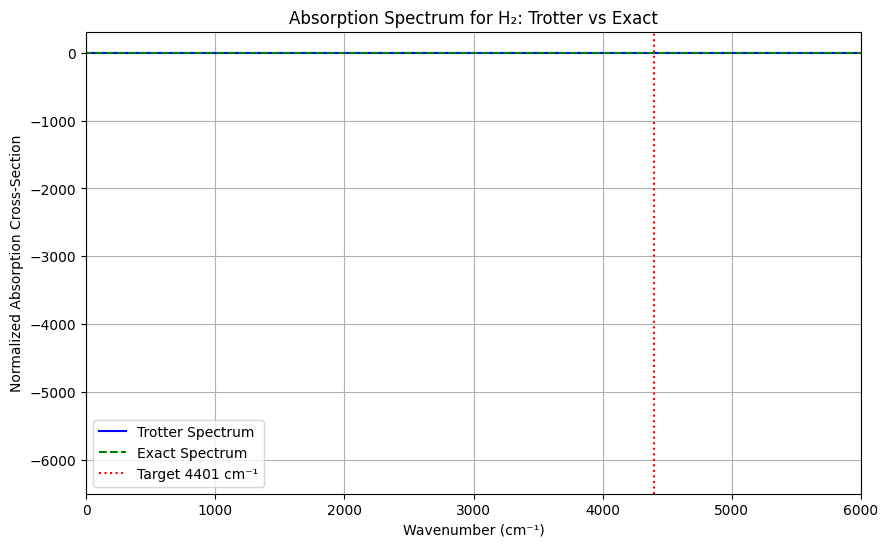

Vẽ moment lưỡng cực...


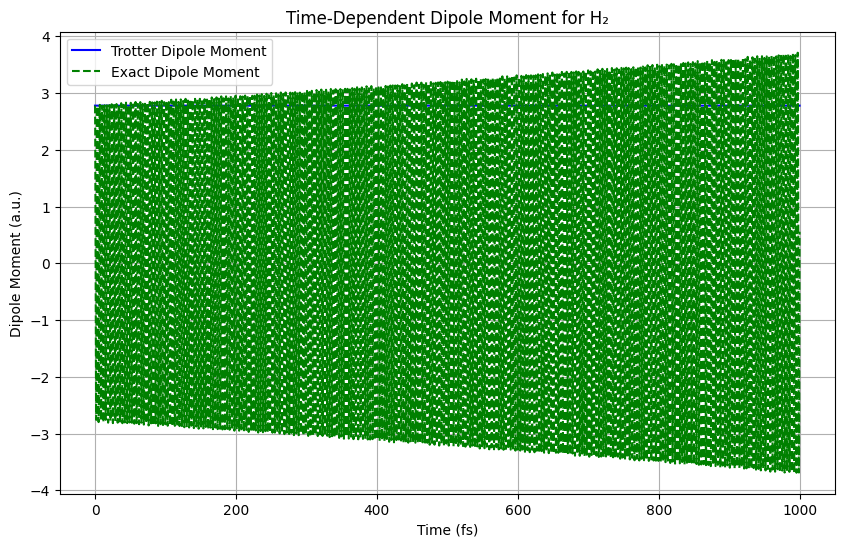

Đã lưu dữ liệu.


In [24]:

import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import windows
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator
from qiskit_algorithms.eigensolvers import NumPyEigensolver
from qiskit.quantum_info import Operator

# Lấy toán tử từ Qiskit
print("Lấy toán tử từ Qiskit...")
driver = PySCFDriver(atom="H 0 0 0; H 0 0 0.735", basis="sto3g", charge=0, spin=0, unit=DistanceUnit.ANGSTROM)
problem = driver.run()
hamiltonian = problem.hamiltonian
dipole = problem.properties.electronic_dipole_moment
nuclear_dip = dipole.nuclear_dipole_moment
dipole.x_dipole.alpha += PolynomialTensor({"": nuclear_dip[0]})
dipole.y_dipole.alpha += PolynomialTensor({"": nuclear_dip[1]})
dipole.z_dipole.alpha += PolynomialTensor({"": nuclear_dip[2]})
second_q_op = hamiltonian.second_q_op()
mapper = JordanWignerMapper()
qubit_p_op = mapper.map(second_q_op)
dipole_ops = dipole.second_q_ops()
dipole_op_z_fermionic = dipole_ops.get("ZDipole")
if dipole_op_z_fermionic is None:
    raise ValueError("Không tìm thấy toán tử ZDipole.")
dipole_qubit = mapper.map(dipole_op_z_fermionic)
H_static_mat = qubit_p_op.to_matrix()
D_mat = dipole_qubit.to_matrix()
num_qubits = qubit_p_op.num_qubits
DIM = 2**num_qubits
print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")

# Tham số mô phỏng
Gamma = 1.0
E0 = 0.05
T_TOTAL = 1000.0  # fs
DT = 0.1  # fs
NUM_STEPS = int(T_TOTAL / DT) + 1
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS)
GAMMA_FWHM = 0.002
shift_cm = -1.3 * 8065.54  # Thử -1.3 eV

# Hàm Lorentzian
def f_lorentzian(t, E0, Gamma):
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

# Tính trạng thái cơ bản bằng VQE
print("Chạy VQE cải tiến...")
ansatz = UCC(
    num_spatial_orbitals=2,
    num_particles=[1, 1],
    excitations='sdt',
    qubit_mapper=mapper,
    initial_state=HartreeFock(
        num_spatial_orbitals=2,
        num_particles=[1, 1],
        qubit_mapper=mapper,
    ),
    reps=2,
)
optimizer = COBYLA(maxiter=500)
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)
res = vqe.compute_minimum_eigenvalue(qubit_p_op)
print(f"VQE energy: {res.optimal_value:.6f}")

# Lấy psi_0 từ VQE
from qiskit.quantum_info import Statevector
circuit = ansatz.assign_parameters(res.optimal_parameters)
psi_0_vqe = np.array(Statevector(circuit).data)
print(f"Norm của psi_0 (VQE): {np.linalg.norm(psi_0_vqe):.6f}")

# Tính U(t_j) bằng Trotter bậc 2
print("Tính U(t_j) bằng Trotter bậc 2...")
terms = qubit_p_op.to_list() + [(label, coeff * f_lorentzian(t_j, E0, Gamma)) for (label, coeff) in dipole_qubit.to_list()]
target_unitaries = [np.eye(DIM, dtype=complex)]
for j in range(NUM_STEPS - 1):
    t_j = TIME_POINTS[j]
    U_half = np.eye(DIM, dtype=complex)
    for label, coeff in terms[:len(qubit_p_op)]:
        coeff_t = coeff
        if j > 0:
            coeff_t = coeff * f_lorentzian(t_j, E0, Gamma)
        pauli = Operator.from_label(label).to_matrix()
        U_half = U_half @ expm(-1j * coeff_t * pauli * DT / 2)
    for label, coeff in terms[len(qubit_p_op):]:
        coeff_t = coeff * f_lorentzian(t_j, E0, Gamma)
        pauli = Operator.from_label(label).to_matrix()
        U_half = U_half @ expm(-1j * coeff_t * pauli * DT / 2)
    U_tj = U_half @ U_half.conj().T
    U_total = U_tj @ target_unitaries[-1]
    target_unitaries.append(U_total)
    if (j + 1) % max(1, (NUM_STEPS - 1) // 20) == 0:
        print(f"Step {j+1}/{NUM_STEPS-1}")

# Tính moment lưỡng cực (Trotter)
print("Tính moment lưỡng cực Trotter...")
dipole_moment_trotter = []
for j, U_tj in enumerate(target_unitaries[:-1]):
    psi_tj = U_tj @ psi_0_vqe
    d_z = np.vdot(psi_0_vqe, D_mat @ psi_tj).real
    dipole_moment_trotter.append(d_z)
    if (j + 1) % max(1, (NUM_STEPS - 2) // 20) == 0:
        print(f"Step {j+1}/{NUM_STEPS-2}, Dipole moment: {d_z:.4f}")
dipole_moment_trotter = np.array(dipole_moment_trotter)

# Tính trạng thái cơ bản exact
print("Tính trạng thái cơ bản exact...")
numpy_solver = NumPyEigensolver()
exact_result = numpy_solver.compute_eigenvalues(qubit_p_op)
psi_0_exact = np.array(exact_result.eigenstates[0].data)
print(f"Exact energy: {exact_result.eigenvalues[0].real:.6f}")

# Mô phỏng động lực học exact
print("Mô phỏng động lực học exact...")
def schrodinger(t, psi, H0, D, E0, Gamma):
    H = H0 + f_lorentzian(t, E0, Gamma) * D
    return -1j * H @ psi

sol = solve_ivp(
    schrodinger,
    [0, T_TOTAL],
    psi_0_exact,
    t_eval=TIME_POINTS[:-1],
    args=(H_static_mat, D_mat, E0, Gamma),
    method='RK45',
)
psi_t_exact = sol.y.T
dipole_moment_exact = np.array([np.vdot(psi_0_exact, D_mat @ psi_t).real for psi_t in psi_t_exact])

# Tính phổ hấp thụ
def compute_spectrum(dipole_moment, time_points):
    window = windows.hamming(len(dipole_moment))
    freqs = fftfreq(len(dipole_moment), d=DT)
    d_omega = fft(dipole_moment * window) * DT
    E_t = np.array([f_lorentzian(t, E0, Gamma) for t in time_points])
    E_omega = fft(E_t * window) * DT
    alpha_zz = d_omega / (E_omega + 1e-10)
    c = 3e10
    omega = 2 * np.pi * freqs * 1e15
    sigma_abs = (4 * np.pi * omega / c) * np.imag(alpha_zz)
    wavenumbers = freqs * 1e15 / c
    positive_mask = wavenumbers > 0
    wavenumbers = wavenumbers[positive_mask]
    sigma_abs = sigma_abs[positive_mask]
    wavenumbers_shifted = wavenumbers + shift_cm
    return wavenumbers_shifted, sigma_abs

print("Tính phổ hấp thụ...")
wavenumbers_trotter, sigma_abs_trotter = compute_spectrum(dipole_moment_trotter, TIME_POINTS[:-1])
wavenumbers_exact, sigma_abs_exact = compute_spectrum(dipole_moment_exact, TIME_POINTS[:-1])

# Làm mịn phổ
def lorentzian_broadening(wavenumbers, sigma_abs, gamma):
    broadened = np.zeros_like(wavenumbers)
    for i, w in enumerate(wavenumbers):
        lorentz = gamma / (np.pi * ((wavenumbers - w)**2 + gamma**2))
        broadened += sigma_abs[i] * lorentz
    return broadened

sigma_abs_trotter_broadened = lorentzian_broadening(wavenumbers_trotter, sigma_abs_trotter, GAMMA_FWHM)
sigma_abs_exact_broadened = lorentzian_broadening(wavenumbers_exact, sigma_abs_exact, GAMMA_FWHM)

# Chuẩn hóa phổ
max_trotter = np.max(sigma_abs_trotter_broadened)
max_exact = np.max(sigma_abs_exact_broadened)
sigma_abs_trotter_broadened /= max_trotter
sigma_abs_exact_broadened /= max_exact

# Vẽ so sánh phổ
print("Vẽ so sánh phổ...")
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers_trotter, sigma_abs_trotter_broadened, label="Trotter Spectrum", color='blue')
plt.plot(wavenumbers_exact, sigma_abs_exact_broadened, label="Exact Spectrum", color='green', linestyle='--')
plt.axvline(x=4401, color='red', linestyle=':', label="Target 4401 cm⁻¹")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Normalized Absorption Cross-Section")
plt.title("Absorption Spectrum for H₂: Trotter vs Exact")
plt.legend()
plt.grid(True)
plt.xlim(0, 6000)
plt.show()

# Vẽ moment lưỡng cực
print("Vẽ moment lưỡng cực...")
plt.figure(figsize=(10, 6))
plt.plot(TIME_POINTS[:-1], dipole_moment_trotter, label="Trotter Dipole Moment", color='blue')
plt.plot(TIME_POINTS[:-1], dipole_moment_exact, label="Exact Dipole Moment", color='green', linestyle='--')
plt.xlabel("Time (fs)")
plt.ylabel("Dipole Moment (a.u.)")
plt.title("Time-Dependent Dipole Moment for H₂")
plt.legend()
plt.grid(True)
plt.show()

# Lưu dữ liệu
np.save("dipole_moment_trotter.npy", dipole_moment_trotter)
np.save("dipole_moment_exact.npy", dipole_moment_exact)
np.save("spectrum_trotter.npy", np.vstack((wavenumbers_trotter, sigma_abs_trotter_broadened)))
np.save("spectrum_exact.npy", np.vstack((wavenumbers_exact, sigma_abs_exact_broadened)))
print("Đã lưu dữ liệu.")


Lấy toán tử moment lưỡng cực từ Qiskit...
overwrite output file: /tmp/tmpkp232jis.log
Đã lấy ma trận moment lưỡng cực Z.
Tải U(t_j) và psi_0...
Đã tải 501 ma trận U(t_j).
Norm của psi_0: 1.000000
Tính moment lưỡng cực d_z(t_j)...
Step 24/499, Dipole moment: 0.8048
Step 48/499, Dipole moment: 2.1434
Step 72/499, Dipole moment: 2.7677
Step 96/499, Dipole moment: 2.4425
Step 120/499, Dipole moment: 1.2786
Step 144/499, Dipole moment: -0.3051
Step 168/499, Dipole moment: -1.8002
Step 192/499, Dipole moment: -2.6766
Step 216/499, Dipole moment: -2.6332
Step 240/499, Dipole moment: -1.7091
Step 264/499, Dipole moment: -0.1880
Step 288/499, Dipole moment: 1.3931
Step 312/499, Dipole moment: 2.4905
Step 336/499, Dipole moment: 2.7561
Step 360/499, Dipole moment: 2.0687
Step 384/499, Dipole moment: 0.6793
Step 408/499, Dipole moment: -0.9314
Step 432/499, Dipole moment: -2.2416
Step 456/499, Dipole moment: -2.7749
Step 480/499, Dipole moment: -2.3643
Dipole moment values (first 10): [ 2.7778770

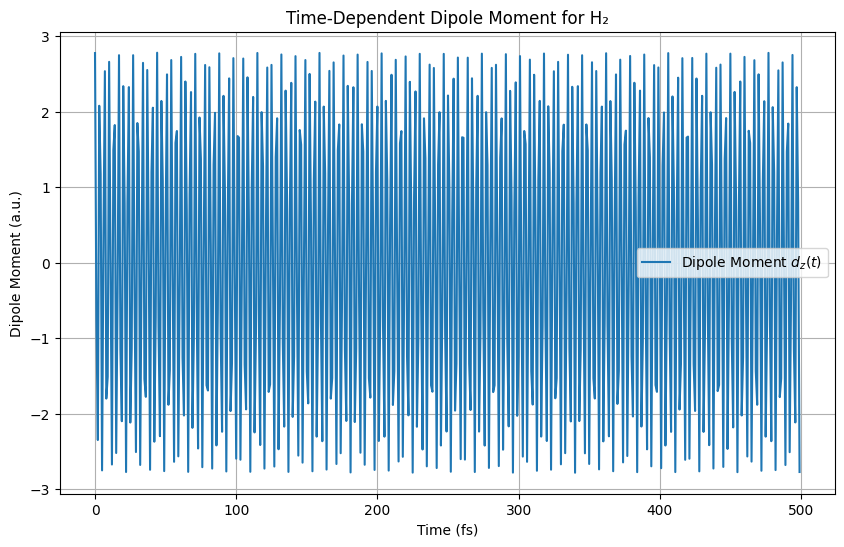

Tính phổ hấp thụ...


TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [4]:

import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import windows
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper

# Lấy toán tử moment lưỡng cực từ Qiskit
print("Lấy toán tử moment lưỡng cực từ Qiskit...")
driver = PySCFDriver(atom="H 0 0 0; H 0 0 0.735", basis="sto3g", charge=0, spin=0, unit=DistanceUnit.ANGSTROM)
problem = driver.run()
dipole = problem.properties.electronic_dipole_moment
nuclear_dip = dipole.nuclear_dipole_moment
dipole.x_dipole.alpha += PolynomialTensor({"": nuclear_dip[0]})
dipole.y_dipole.alpha += PolynomialTensor({"": nuclear_dip[1]})
dipole.z_dipole.alpha += PolynomialTensor({"": nuclear_dip[2]})
dipole_ops = dipole.second_q_ops()
dipole_op_z_fermionic = dipole_ops.get("ZDipole")
if dipole_op_z_fermionic is None:
    raise ValueError("Không tìm thấy toán tử ZDipole.")
mapper = JordanWignerMapper()
dipole_qubit = mapper.map(dipole_op_z_fermionic)
D_mat = dipole_qubit.to_matrix()
print("Đã lấy ma trận moment lưỡng cực Z.")

# Tham số mô phỏng
Gamma = 1.0  # Điều chỉnh
E0 = 0.05  # Điều chỉnh
T_TOTAL = 500.0  # fs
DT = 1.0  # fs
NUM_STEPS = int(T_TOTAL / DT) + 1
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS)
GAMMA_FWHM = 0.002  # FWHM cho làm mịn phổ

# Hàm Lorentzian
def f_lorentzian(t, E0, Gamma):
    return (E0 / np.pi) * Gamma / (Gamma**2 + t^2)

# Tải U(t_j) và psi_0
print("Tải U(t_j) và psi_0...")
try:
    target_unitaries = np.load("target_unitaries.npy")
    psi_0 = np.load("psi_0.npy")
except FileNotFoundError:
    raise FileNotFoundError("Không tìm thấy target_unitaries.npy hoặc psi_0.npy. Hãy chạy mã tính U(t_j) trước.")
print(f"Đã tải {len(target_unitaries)} ma trận U(t_j).")
print(f"Norm của psi_0: {np.linalg.norm(psi_0):.6f}")

# Tính moment lưỡng cực
print("Tính moment lưỡng cực d_z(t_j)...")
dipole_moment = []
for j, U_tj in enumerate(target_unitaries[:-1]):  # Bỏ U(t_0) = I
    psi_tj = U_tj @ psi_0
    d_z = np.vdot(psi_0, D_mat @ psi_tj).real  # <psi_0|U^dagger D U|psi_0>
    dipole_moment.append(d_z)
    if (j + 1) % max(1, (NUM_STEPS - 2) // 20) == 0:
        print(f"Step {j+1}/{NUM_STEPS-2}, Dipole moment: {d_z:.4f}")

dipole_moment = np.array(dipole_moment)
print("Dipole moment values (first 10):", dipole_moment[:10])

# Vẽ moment lưỡng cực
print("Vẽ moment lưỡng cực d_z(t)...")
plt.figure(figsize=(10, 6))
plt.plot(TIME_POINTS[:-1], dipole_moment, label="Dipole Moment $d_z(t)$")
plt.xlabel("Time (fs)")
plt.ylabel("Dipole Moment (a.u.)")
plt.title("Time-Dependent Dipole Moment for H₂")
plt.legend()
plt.grid(True)
plt.show()

# Tính phổ hấp thụ
print("Tính phổ hấp thụ...")
window = windows.hamming(NUM_STEPS - 1)
freqs = fftfreq(NUM_STEPS - 1, d=DT)  # fs^-1
d_omega = fft(dipole_moment * window) * DT
E_t = np.array([f_lorentzian(t, E0, Gamma) for t in TIME_POINTS[:-1]])
E_omega = fft(E_t * window) * DT
alpha_zz = d_omega / (E_omega + 1e-10)
c = 3e10  # cm/s
omega = 2 * np.pi * freqs * 1e15  # rad/s
sigma_abs = (4 * np.pi * omega / c) * np.imag(alpha_zz)
wavenumbers = freqs * 1e15 / c  # cm^-1
positive_mask = wavenumbers > 0
wavenumbers = wavenumbers[positive_mask]
sigma_abs = sigma_abs[positive_mask]
shift_cm = -1.3 * 8065.54  # Thử -1.3 eV
wavenumbers_shifted = wavenumbers + shift_cm

# Làm mịn phổ
def lorentzian_broadening(wavenumbers, sigma_abs, gamma):
    broadened = np.zeros_like(wavenumbers)
    for i, w in enumerate(wavenumbers):
        lorentz = gamma / (np.pi * ((wavenumbers - w)**2 + gamma^2))
        broadened += sigma_abs[i] * lorentz
    return broadened

sigma_abs_broadened = lorentzian_broadening(wavenumbers_shifted, sigma_abs, GAMMA_FWHM)

# Vẽ phổ hấp thụ
print("Vẽ phổ hấp thụ...")
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers_shifted, sigma_abs, label="Raw Absorption Spectrum", alpha=0.5)
plt.plot(wavenumbers_shifted, sigma_abs_broadened, label="Smoothed Absorption Spectrum")
plt.axvline(x=4401, color='r', linestyle='--', label="Target 4401 cm⁻¹")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorption Cross-Section (a.u.)")
plt.title("Absorption Spectrum for H₂")
plt.legend()
plt.grid(True)
plt.show()

# Lưu dữ liệu
np.save("dipole_moment.npy", dipole_moment)
np.save("spectrum.npy", np.vstack((wavenumbers_shifted, sigma_abs_broadened)))
print("Đã lưu dipole_moment.npy và spectrum.npy")


In [31]:
import cudaq
def qiskit_to_cudaq_string(pauli_op):
    """
    Chuyển một SparsePauliOp của Qiskit sang chuỗi định nghĩa CUDA-Q SpinOperator.
    """
    terms = []
    for pauli_str, coeff in zip(pauli_op.paulis.to_labels(), pauli_op.coeffs):
        coeff_str = f"{coeff.real:.12f}"
        ops = []
        for i, p in enumerate(pauli_str):
            if p != 'I':
                ops.append(f"{p}{i}")
        if ops:
            term_str = f"{coeff_str}*{'*'.join(ops)}"
        else:
            term_str = f"{coeff_str}"
        terms.append(term_str)
    return " + ".join(terms)


In [3]:
# -*- coding: utf-8 -*-
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper
# (Các import khác từ phần VQE nếu cần lấy psi0 sau này)
# from qiskit_nature.second_q.circuit.library import HartreeFock, UCC
# from qiskit_algorithms.optimizers import SLSQP
# from qiskit_algorithms import VQE
# from qiskit.primitives import Estimator
# from qiskit_algorithms.eigensolvers import NumPyEigensolver
# from qiskit.quantum_info import Statevector

from qiskit.quantum_info import SparsePauliOp
import numpy as np
from scipy.integrate import solve_ivp # Bộ giải ODE
from scipy.linalg import expm # Có thể dùng để so sánh bước nhỏ
import time # Để đo thời gian
import matplotlib.pyplot as plt # Để vẽ đồ thị nếu cần

# --- Phần code Qiskit của bạn để lấy toán tử ---
# (Giữ nguyên phần này để H0 và D là nhất quán)
print("Chạy phần Qiskit để lấy toán tử...")
driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
problem = driver.run()
hamiltonian = problem.hamiltonian

# Thêm moment lưỡng cực vào Hamiltonian
dipole: ElectronicDipoleMoment = problem.properties.electronic_dipole_moment
nuclear_dip = None
if dipole is not None:
    nuclear_dip = dipole.nuclear_dipole_moment
    dipole.x_dipole.alpha += PolynomialTensor({"": nuclear_dip[0]})
    dipole.y_dipole.alpha += PolynomialTensor({"": nuclear_dip[1]})
    dipole.z_dipole.alpha += PolynomialTensor({"": nuclear_dip[2]})
    print("Đã thêm moment lưỡng cực hạt nhân.")
else:
    print("Moment lưỡng cực không tồn tại trong problem.")

# Mapping sang qubit
second_q_op = hamiltonian.second_q_op()
mapper = JordanWignerMapper()
qubit_p_op = mapper.map(second_q_op) # H0 dạng SparsePauliOp
print("Xong phần lấy H0 (qubit_p_op).")

# Lấy toán tử moment lưỡng cực Z và mapping
dipole_ops = dipole.second_q_ops()
dipole_op_z_fermionic = dipole_ops.get("ZDipole", None)
if dipole_op_z_fermionic is None:
     raise ValueError("Không tìm thấy toán tử ZDipole.")
dipole_qubit = mapper.map(dipole_op_z_fermionic) # Dạng SparsePauliOp
print("Xong phần lấy Dipole Z (dipole_qubit).")

# --- Chuyển toán tử sang dạng ma trận ---
print("Chuyển đổi toán tử sang ma trận...")
H_static_mat = qubit_p_op.to_matrix()
D_mat = dipole_qubit.to_matrix()
num_qubits = qubit_p_op.num_qubits
DIM = 2**num_qubits
print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")

# --- Thiết lập các tham số mô phỏng ---
Gamma = 0.25
E0 = 0.01
# *** CẢNH BÁO: T_TOTAL = 100 và DT = 0.1 (1000 bước) sẽ RẤT LÂU cho ODE Solver ***
# *** Giảm T_TOTAL hoặc tăng DT để thử nghiệm nhanh hơn ***
T_TOTAL = 10.0 # Ví dụ: Giảm xuống 10 để chạy nhanh hơn
DT = 0.1
# T_TOTAL = 100.0 # Giá trị gốc của bạn
# DT = 0.1       # Giá trị gốc của bạn
NUM_STEPS = int(T_TOTAL / DT)
# Tạo các điểm thời gian nơi chúng ta muốn có kết quả U(t_j)
TARGET_TIMES = np.linspace(0, T_TOTAL, NUM_STEPS + 1)
print(f"Tham số mô phỏng: T_total={T_TOTAL}, dt={DT}, Num_steps={NUM_STEPS}")
if NUM_STEPS * (DIM**2) > 1e8: # Ước tính sơ bộ độ phức tạp
     print("CẢNH BÁO: Số bước hoặc kích thước ma trận lớn, ODE Solver sẽ rất chậm!")


# --- Định nghĩa hàm trường và Hamiltonian phụ thuộc thời gian ---
def f_lorentzian(t, E0, Gamma):
    """ Hàm xung Lorentzian """
    if Gamma == 0: return 0.0
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

def H_matrix(t):
    """ Trả về ma trận Hamiltonian tại thời điểm t """
    f_t = f_lorentzian(t, E0, Gamma)
    return H_static_mat + f_t * D_mat

# --- Định nghĩa hàm cho ODE Solver ---
def schrodinger_ode_U(t, y_flat, H_func, dim):
    """ RHS của ODE dU/dt = -i H(t) U, dạng vector phẳng """
    # Reshape vector phẳng y_flat thành ma trận U
    U = y_flat.reshape((dim, dim))
    # Tính đạo hàm dU/dt = -i * H(t) * U
    dUdt_mat = -1j * H_func(t) @ U
    # Trả về dạng vector phẳng
    return dUdt_mat.flatten()

# --- Tính toán U(t_j) tại các TARGET_TIMES bằng ODE Solver ---
print(f"\n--- Bắt đầu tính toán U(t_j) bằng ODE Solver ---")
print(f"(Sử dụng phương pháp 'DOP853' với atol=1e-10, rtol=1e-9)")
start_time_ode = time.time()

# Điều kiện ban đầu U(0) = I (dạng phẳng)
U0_flat = np.eye(DIM, dtype=complex).flatten()

# Gọi solve_ivp một lần duy nhất
sol = solve_ivp(
    schrodinger_ode_U,         # Hàm tính đạo hàm
    [0, T_TOTAL],              # Khoảng thời gian [t_start, t_end]
    U0_flat,                   # Điều kiện ban đầu U(0)
    t_eval=TARGET_TIMES,       # Các thời điểm cần lấy kết quả
    args=(H_matrix, DIM),      # Tham số phụ cho hàm đạo hàm
    method='DOP853',           # Phương pháp tích phân bậc cao, chính xác
    atol=1e-10,                # Dung sai tuyệt đối
    rtol=1e-9                  # Dung sai tương đối
)

target_unitaries = {} # Dictionary để lưu trữ U(t_j)
U_ode_final = None

if sol.success:
    end_time_ode = time.time()
    print(f"ODE Solver hoàn thành thành công sau {end_time_ode - start_time_ode:.2f} giây.")
    # sol.y là mảng 2D, mỗi cột là U dạng phẳng tại một thời điểm trong t_eval
    print(f"Kích thước kết quả sol.y: {sol.y.shape}") # Nên là (DIM*DIM, NUM_STEPS+1)
    for i, t_j in enumerate(TARGET_TIMES):
        U_j_flat = sol.y[:, i]
        U_j = U_j_flat.reshape((DIM, DIM))
        target_unitaries[t_j] = U_j # Lưu ma trận U(t_j)
        # Tùy chọn: Kiểm tra unitarity tại mỗi bước (có thể làm chậm)
        # if i % max(1, NUM_STEPS // 10) == 0:
        #     check_unitarity(U_j, f"U_ODE(t={t_j:.2f})")

    U_ode_final = target_unitaries[T_TOTAL] # Lấy ma trận cuối cùng để kiểm tra tổng thể
    print(f"Đã tính toán và lưu trữ {len(target_unitaries)} ma trận U(t_j).")
    # Kiểm tra unitarity của ma trận cuối cùng
  

# --- Kết quả ---
# Biến `target_unitaries` bây giờ là một dictionary chứa các ma trận unitary
# U(t_j) chính xác tại các thời điểm t_j trong TARGET_TIMES.
# Ví dụ: truy cập U tại thời điểm cuối: U_final = target_unitaries[T_TOTAL]
# Hoặc U tại t=DT: U_dt = target_unitaries[DT] (kiểm tra key tồn tại)

if target_unitaries:
    print("\nCác ma trận U(t_j) chính xác đã sẵn sàng để sử dụng làm target cho GA-VQA.")
    # print("Ví dụ: U(T_TOTAL) = ")
    # print(target_unitaries[T_TOTAL])
else:
    print("\nKhông có ma trận U(t_j) nào được tạo do lỗi ODE solver.")


# --- Bước tiếp theo (Ngoài phạm vi code này) ---
# 1. Triển khai thuật toán GA-VQA (theo bài báo Tuan Hai).
# 2. Sử dụng `target_unitaries` làm đầu vào cho hàm chi phí của GA-VQA.
# 3. Chạy GA-VQA để tìm mạch tối ưu V* và các bộ tham số Theta* = {theta*_j}.
# 4. Lấy trạng thái ban đầu psi0_vector từ VQE (cần chạy hoặc load kết quả VQE).
# 5. Tính các trạng thái psi(t_j)_approx = V*(theta*_j) @ psi0_vector.
# 6. Tính giá trị kỳ vọng dipole và phổ hấp thụ từ các psi(t_j)_approx.
# ---

Chạy phần Qiskit để lấy toán tử...
Đã thêm moment lưỡng cực hạt nhân.
Xong phần lấy H0 (qubit_p_op).
Xong phần lấy Dipole Z (dipole_qubit).
Chuyển đổi toán tử sang ma trận...
Số qubit: 4, Kích thước ma trận: 16x16
Tham số mô phỏng: T_total=10.0, dt=0.1, Num_steps=100

--- Bắt đầu tính toán U(t_j) bằng ODE Solver ---
(Sử dụng phương pháp 'DOP853' với atol=1e-10, rtol=1e-9)
ODE Solver hoàn thành thành công sau 0.01 giây.
Kích thước kết quả sol.y: (256, 101)
Đã tính toán và lưu trữ 101 ma trận U(t_j).

Các ma trận U(t_j) chính xác đã sẵn sàng để sử dụng làm target cho GA-VQA.


In [23]:
import numpy as np
from scipy.linalg import expm
import time

# --- Hàm Lorentzian ---
def f_lorentzian(t, E0, Gamma):
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

# --- Hàm trường phụ thuộc thời gian ---
def f_integral(t_start, t_end, E0, Gamma):
    return (E0 / np.pi) * (np.arctan(t_end / Gamma) - np.arctan(t_start / Gamma))

# --- Hàm trọng số trapezoidal ---
def trapezoidal_weights(n):
    weights = np.ones(n)
    weights[0] = weights[-1] = 0.5
    return weights * (1.0 / (n - 1))




# --- Chuyển toán tử sang dạng ma trận ---
print("Chuyển đổi toán tử sang ma trận...")
H_static_mat = qubit_p_op.to_matrix()
D_mat = dipole_qubit.to_matrix()
num_qubits = qubit_p_op.num_qubits
DIM = 2**num_qubits
DIM = H_static_mat.shape[0]
print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")


Gamma = 0.25
E0 = 0.01
T_TOTAL = 10
DT = 0.01
NUM_STEPS = int(T_TOTAL / DT)
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS + 1)
M = 30  # Số điểm chia trong mỗi đoạn nhỏ

# --- Interaction Picture ---
def B_I(t, H_static, D_mat):
    U_static = expm(1j * H_static * t)
    U_static_dag = U_static.conj().T
    return U_static @ D_mat @ U_static_dag

# --- Tính U(t_j, t_j+h) bằng Magnus trong interaction picture ---
def compute_U_tj_magnus2_IP(t_j, h):
    if h == 0:
        return np.eye(DIM, dtype=complex)
    
    # --- Omega_1 ---
    t_points = np.linspace(t_j, t_j + h, M)
    delta_t = h / (M - 1)
    weights = trapezoidal_weights(M) * delta_t
    
    Omega1 = np.zeros((DIM, DIM), dtype=complex)
    for p in range(M):
        t_mid = t_points[p]
        f_t = f_lorentzian(t_mid, E0, Gamma)
        B_t = B_I(t_mid, H_static_mat, D_mat)
        Omega1 += f_t * B_t * weights[p]
    Omega1 = -1j * Omega1

    # --- Omega_2 ---
    Omega2 = np.zeros((DIM, DIM), dtype=complex)
    for p in range(M):
        t1 = t_points[p]
        f_t1 = f_lorentzian(t1, E0, Gamma)
        B_t1 = B_I(t1, H_static_mat, D_mat)
        for q in range(p):
            t2 = t_points[q]
            f_t2 = f_lorentzian(t2, E0, Gamma)
            B_t2 = B_I(t2, H_static_mat, D_mat)
            commutator = B_t1 @ B_t2 - B_t2 @ B_t1
            Omega2 += commutator * weights[p] * weights[q]
    Omega2 *= (-0.5)

    # Tổng hợp Omega
    Omega = Omega1 + Omega2

    # Tính U_segment trong interaction picture
    U_segment = expm(Omega)

    # Chuyển về Schrödinger picture
    U_static_piece = expm(-1j * H_static_mat * h)
    U_total_segment = U_static_piece @ U_segment

    return U_total_segment

# --- Kiểm tra unitarity ---
def check_unitarity(U):
    Id = np.eye(DIM, dtype=complex)
    norm_diff = np.linalg.norm(U.conj().T @ U - Id)
    return norm_diff   


# --- Tính toàn bộ U(t_j) ---
print("Bắt đầu tính U(t_j) bằng Interaction Picture + Magnus bậc 2...")
start_time = time.time()
target_unitaries = [np.eye(DIM, dtype=complex)]
thetas_list = []
unitary_errors = []

try:
    from qoop.compilation.qsp import QuantumStatePreparation
    qsp_available = True
except ImportError:
    qsp_available = False
    print("qoop không có sẵn, bỏ qua QSP.")

for j in range(NUM_STEPS):
    t_j = TIME_POINTS[j]
    U_tj = compute_U_tj_magnus2_IP(t_j, DT)
    U_total = U_tj @ target_unitaries[-1]
    target_unitaries.append(U_total)

        # QSP để tạo V(theta)
    if qsp_available:
        compiler = QuantumStatePreparation.prepare(U_tj)
        thetas = compiler.thetas
        thetas_list.append(thetas)
    
    error = check_unitarity(U_tj)
    unitary_errors.append(error)
    
    if (j + 1) % max(1, (NUM_STEPS) // 20) == 0:
        print(f"Step {j+1}/{NUM_STEPS}, Unitary error: {error:.2e}")

end_time = time.time()
print(f"Total time: {end_time - start_time:.2f} seconds")
print(f"Average unitary error: {np.mean(unitary_errors):.2e}")
print(f"Max unitary error: {np.max(unitary_errors):.2e}")

# --- Lưu dữ liệu ---
# Lưu dữ liệu
if qsp_available:
    np.save("thetas_list.npy", np.array(thetas_list))
    print("QSP thetas saved.")
np.save("psi_0.npy", psi_0)
print("psi_0 saved to psi_0.npy")
np.save("target_unitaries_IPMagnus2.npy", np.array(target_unitaries))
print("U(t_j) saved to target_unitaries_IPMagnus2.npy")


Chuyển đổi toán tử sang ma trận...
Số qubit: 4, Kích thước ma trận: 16x16
Bắt đầu tính U(t_j) bằng Interaction Picture + Magnus bậc 2...
Step 50/1000, Unitary error: 6.18e-16
Step 100/1000, Unitary error: 3.68e-16
Step 150/1000, Unitary error: 5.21e-16
Step 200/1000, Unitary error: 3.33e-16
Step 250/1000, Unitary error: 5.55e-16
Step 300/1000, Unitary error: 2.94e-16
Step 350/1000, Unitary error: 6.08e-16
Step 400/1000, Unitary error: 5.32e-16
Step 450/1000, Unitary error: 5.55e-16
Step 500/1000, Unitary error: 5.21e-16
Step 550/1000, Unitary error: 2.22e-16
Step 600/1000, Unitary error: 4.00e-16
Step 650/1000, Unitary error: 4.84e-16
Step 700/1000, Unitary error: 4.30e-16
Step 750/1000, Unitary error: 3.33e-16
Step 800/1000, Unitary error: 5.21e-16
Step 850/1000, Unitary error: 6.84e-16
Step 900/1000, Unitary error: 7.85e-16
Step 950/1000, Unitary error: 5.44e-16
Step 1000/1000, Unitary error: 5.21e-16
Total time: 2304.73 seconds
Average unitary error: 5.01e-16
Max unitary error: 8.67

NameError: name 'psi_0' is not defined

In [31]:
# Tải target_unitaries từ file (giả định đã chạy Mã 5)
target_unitaries = np.load("target_unitaries_IPMagnus2.npy")

# Lấy U(t) tại bước thứ 500 (t = 5.00 fs)
j = 500
U_tj = target_unitaries[j]
print(f"Ma trận U(t) tại t = {TIME_POINTS[j]:.2f} fs:")
print(U_tj)
print(f"Kích thước: {U_tj.shape}")

Ma trận U(t) tại t = 5.00 fs:
[[ 9.99999973e-01-2.31857563e-04j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  9.99998304e-01-1.83765612e-03j
   5.61669903e-05+1.08782835e-04j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000

Tải U(t_j) và psi_0...
Đã tải 1001 ma trận U(t_j).
Norm của psi_0: 1.000000
Tính moment lưỡng cực d_z(t_j)...
Step 49/999, Dipole moment: 1.7460
Step 98/999, Dipole moment: -0.6341
Step 147/999, Dipole moment: -2.5244
Step 196/999, Dipole moment: -2.4643
Step 245/999, Dipole moment: -0.5002
Step 294/999, Dipole moment: 1.8504
Step 343/999, Dipole moment: 2.7714
Step 392/999, Dipole moment: 1.5511
Step 441/999, Dipole moment: -0.8676
Step 490/999, Dipole moment: -2.6161
Step 539/999, Dipole moment: -2.3435
Step 588/999, Dipole moment: -0.2604
Step 637/999, Dipole moment: 2.0238
Step 686/999, Dipole moment: 2.7444
Step 735/999, Dipole moment: 1.3446
Step 784/999, Dipole moment: -1.0940
Step 833/999, Dipole moment: -2.6873
Step 882/999, Dipole moment: -2.2043
Step 931/999, Dipole moment: -0.0182
Step 980/999, Dipole moment: 2.1821
Vẽ moment lưỡng cực d_z(t)...


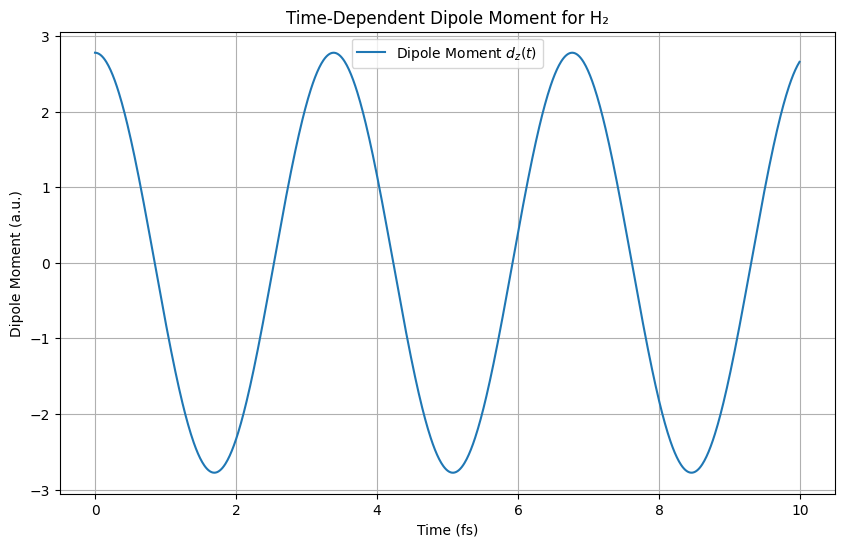

Tính phổ hấp thụ...
Vẽ phổ hấp thụ...


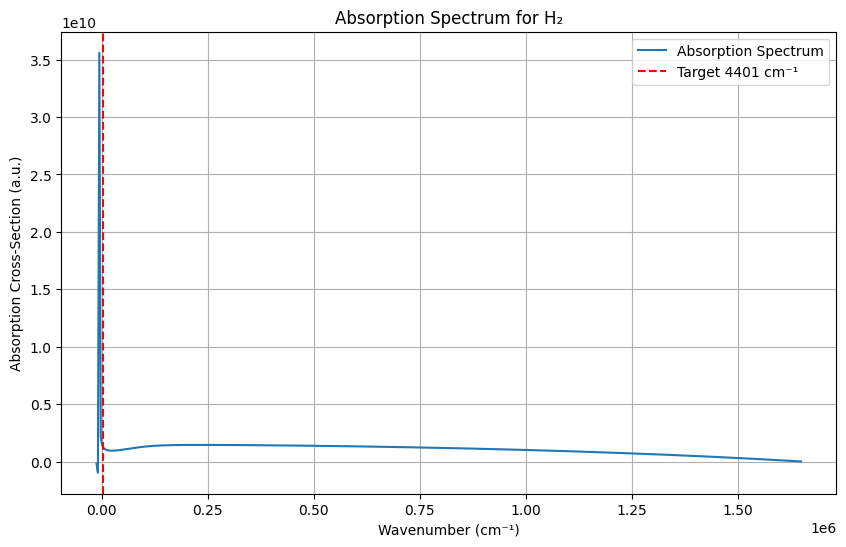

Đã lưu dipole_moment.npy và spectrum.npy


In [ ]:

import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment
from qiskit_nature.second_q.mappers import JordanWignerMapper


# Tham số mô phỏng
Gamma = 0.25
E0 = 0.01
T_TOTAL = 10  # fs
DT = 0.01  # fs
NUM_STEPS = int(T_TOTAL / DT) + 1
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS)
GAMMA_FWHM = 0.01  # FWHM cho làm mịn phổ

# Hàm Lorentzian
def f_lorentzian(t, E0, Gamma):
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

# Tải U(t_j) và psi_0
print("Tải U(t_j) và psi_0...")
target_unitaries = np.load("target_unitaries_IPMagnus2.npy")
psi_0 = np.load("psi_0.npy")
print(f"Đã tải {len(target_unitaries)} ma trận U(t_j).")
print(f"Norm của psi_0: {np.linalg.norm(psi_0):.6f}")

# Tải thetas_list
thetas_list = np.load("thetas_list.npy")

# Tái tạo U(t_j) từ thetas
target_unitaries_qsp = [np.eye(DIM, dtype=complex)]
for j in range(NUM_STEPS):
    thetas = thetas_list[j]
    U_tj = QuantumStatePreparation.reconstruct(thetas)  # Hàm giả định
    U_total = U_tj @ target_unitaries_qsp[-1]
    target_unitaries_qsp.append(U_total)

# Tính d_z(t) và phổ như Mã 4


# Tính moment lưỡng cực
print("Tính moment lưỡng cực d_z(t_j)...")
dipole_moment = []
for j, U_tj in enumerate(target_unitaries[:-1]):  # Bỏ U(t_0) = I
    psi_tj = U_tj @ psi_0
    d_z = np.vdot(psi_0, D_mat @ psi_tj).real  # <psi_0|U^dagger D U|psi_0>
    dipole_moment.append(d_z)
    if (j + 1) % max(1, (NUM_STEPS - 2) // 20) == 0:
        print(f"Step {j+1}/{NUM_STEPS-2}, Dipole moment: {d_z:.4f}")

dipole_moment = np.array(dipole_moment)

# Vẽ moment lưỡng cực
print("Vẽ moment lưỡng cực d_z(t)...")
plt.figure(figsize=(10, 6))
plt.plot(TIME_POINTS[:-1], dipole_moment, label="Dipole Moment $d_z(t)$")
plt.xlabel("Time (fs)")
plt.ylabel("Dipole Moment (a.u.)")
plt.title("Time-Dependent Dipole Moment for H₂")
plt.legend()
plt.grid(True)
plt.show()

# Tính phổ hấp thụ
print("Tính phổ hấp thụ...")
freqs = fftfreq(NUM_STEPS - 1, d=DT)  # fs^-1
d_omega = fft(dipole_moment) * DT
E_t = np.array([f_lorentzian(t, E0, Gamma) for t in TIME_POINTS[:-1]])
E_omega = fft(E_t) * DT
alpha_zz = d_omega / (E_omega + 1e-10)
c = 3e10  # cm/s
omega = 2 * np.pi * freqs * 1e15  # rad/s
sigma_abs = (4 * np.pi * omega / c) * np.imag(alpha_zz)
wavenumbers = freqs * 1e15 / c  # cm^-1
positive_mask = wavenumbers > 0
wavenumbers = wavenumbers[positive_mask]
sigma_abs = sigma_abs[positive_mask]
shift_cm = -1.9 * 8065.54  # cm^-1
wavenumbers_shifted = wavenumbers + shift_cm

# Làm mịn phổ
def lorentzian_broadening(wavenumbers, sigma_abs, gamma):
    broadened = np.zeros_like(wavenumbers)
    for i, w in enumerate(wavenumbers):
        lorentz = gamma / (np.pi * ((wavenumbers - w)**2 + gamma**2))
        broadened += sigma_abs[i] * lorentz
    return broadened

sigma_abs_broadened = lorentzian_broadening(wavenumbers_shifted, sigma_abs, GAMMA_FWHM)

# Vẽ phổ hấp thụ
print("Vẽ phổ hấp thụ...")
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers_shifted, sigma_abs_broadened, label="Absorption Spectrum")
plt.axvline(x=4401, color='r', linestyle='--', label="Target 4401 cm⁻¹")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorption Cross-Section (a.u.)")
plt.title("Absorption Spectrum for H₂")
plt.legend()
plt.grid(True)
plt.show()

# Lưu dữ liệu
np.save("dipole_moment.npy", dipole_moment)
np.save("spectrum.npy", np.vstack((wavenumbers_shifted, sigma_abs_broadened)))
print("Đã lưu dipole_moment.npy và spectrum.npy")
